# Introduction

The insurance company plans to use a logistic regression model in an attempt to improve its customer retention and sales practices.

The data set is sourced from a Kaggle contribution: https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv

The task of this assignment is to predict whether custormers did or did not sign up for the new product.

The response is 'TARGET'. It is an indicator of buying the new product (0 = no, 1= yes)


- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
- 4. Data Preparation
  - Check duplicate
  - Process Missing values
  - Convert data to valid values
  - Convert data type
  - Drop outliers

- 5. Prepped Data Review (Re-run Exploratory Data Analysis)

- 6. Feature selecting
  - Split data set
  
  - normalization & standardization

  - select features for Possion Regression

  - select features for negative binomial regression models

  - select features for multiple linear regression

- 7. Regression Modeling
  - 3 Logistic Regression Models

- 8. Select Models 

  Evaluate and identify the preferred model.
  
- 9. Conclusion

- 10. Reference

# 1. About Dataset
The response variable: TARGET

Attribute's Name and their Description

 0.   TARGET      Indicator of buying the new product (0 = no, 1= yes) 
 1.   loyalty     Loyalty level, from low to high (0 to 3), 99 = unclassified 
 2.   ID          Unique customer identifier
 3.   age         Age in years
 4.   city        Unique code per city
 5.   LOR         Length of relationship in years
 6.   prod_A      Bought Product A (0=no, 1=yes)
 7.   type_A      Type of product A
 8.   type_B      Type of product B
 9.   prod_B      Bought Product B (0=no, 1=yes)
 10.  turnover_A  Amount of money spent on Product A
 11.  turnover_B  Amount of money spent on Product B
 12.  contract    Type of contract
 13.  age_P       Age of partner in years
 14.  lor_M       Length of relationship in months

# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

import missingno as msno
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M7_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [3]:
df.columns

Index(['TARGET', 'loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P',
       'lor_M'],
      dtype='object')

In [4]:
# check data size
df.shape

(14016, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


#### Convert Y to 1, and N to 0 for TARGET

In [6]:
df['TARGET'].value_counts()

N    8000
Y    6016
Name: TARGET, dtype: int64

In [7]:
df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x == 'Y' else 0)
df['TARGET'] = df['TARGET'].astype("int")

In [8]:
df['TARGET'].value_counts()

0    8000
1    6016
Name: TARGET, dtype: int64

#### Summary

The data set has 14016 rows and 15 variables. It has not missing values.

Next, I will explor and analyze the data set.

# 3. Exploratory Data Analysis

In [9]:
from IPython.display import HTML, display
def display_html_ratio_table(data):
    

        
    html = "<table>"
    html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"

    g = data.value_counts()

    for index, value in g.items():
        html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / len(data))

    html += "</table>"
    display(HTML(html))

def cate_vs_response_bars(ori_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(10, 6)
    axes[0].set_title(col)
    sns.countplot(x=col, data=ori_df, ax=axes[0])
    
    axes[1].set_title("%s vs Response " %col)
    sns.countplot(x='TARGET', hue=col, data=ori_df, ax=axes[1])
    #sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

In [10]:
# see the description
df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,0.429224,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,0.494983,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,0.000000,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,1.000000,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [11]:
# To check whether there are duplicated rows in the other columns (without the 1st column INDEX) 
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    11008
True      3008
dtype: int64

The data set has duplicates. They need to process in data preparation step.

<AxesSubplot:>

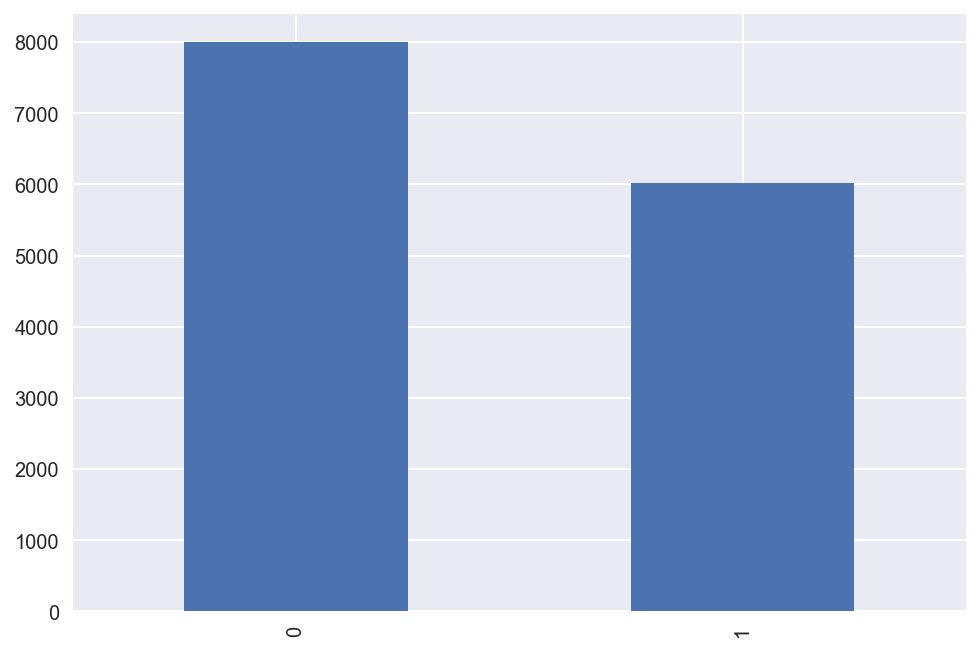

In [12]:
# use bar chart to see the TARGET
df['TARGET'].value_counts().plot.bar()

In [13]:
display_html_ratio_table(df['TARGET'])

name,count,ratio
0,8000,0.5708
1,6016,0.4292


It is binary response. I wil convert N to 0 and Y to 1, in the data preparation step.

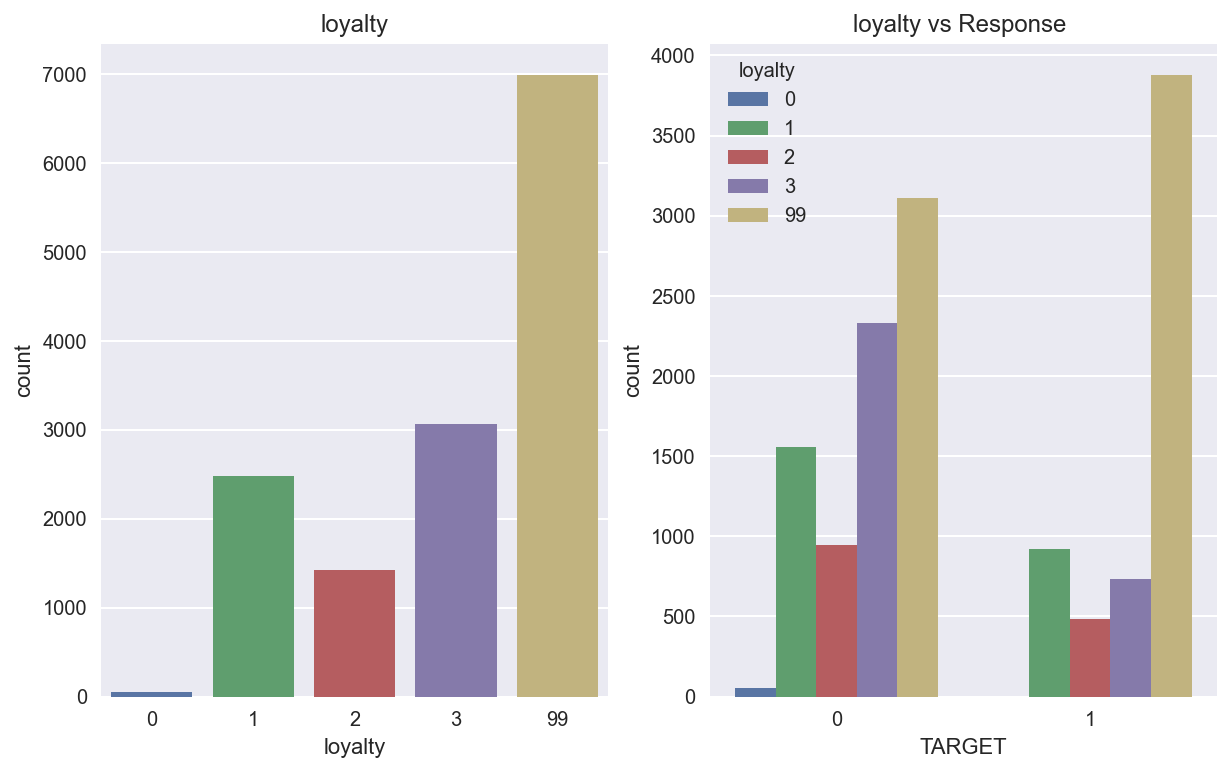

In [14]:
# use bar chart to see the loyalty
#df['loyalty'].value_counts().plot.bar()
cate_vs_response_bars(df, 'loyalty')

In [15]:
display_html_ratio_table(df['loyalty'])

name,count,ratio
99,6986,0.4984
3,3069,0.2190
1,2480,0.1769
2,1425,0.1017
0,56,0.0040


Loyalty level is an ordinal category, from low to high (0 to 99), 99 = unclassified. I will use it as a non-negative discrete COUNT value, because ordinal category should not do the dummy process. The 99 accounts for near 50%. Customers who have 99 loyalty will purchase more insurances than those who have 0-3 loyalty. 

In [16]:
# ID is users' identification.
df['ID'].duplicated().sum()

3008

ID is users' identification. It is not a explanary. I will drop it in data preparation.

In [17]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(14, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])

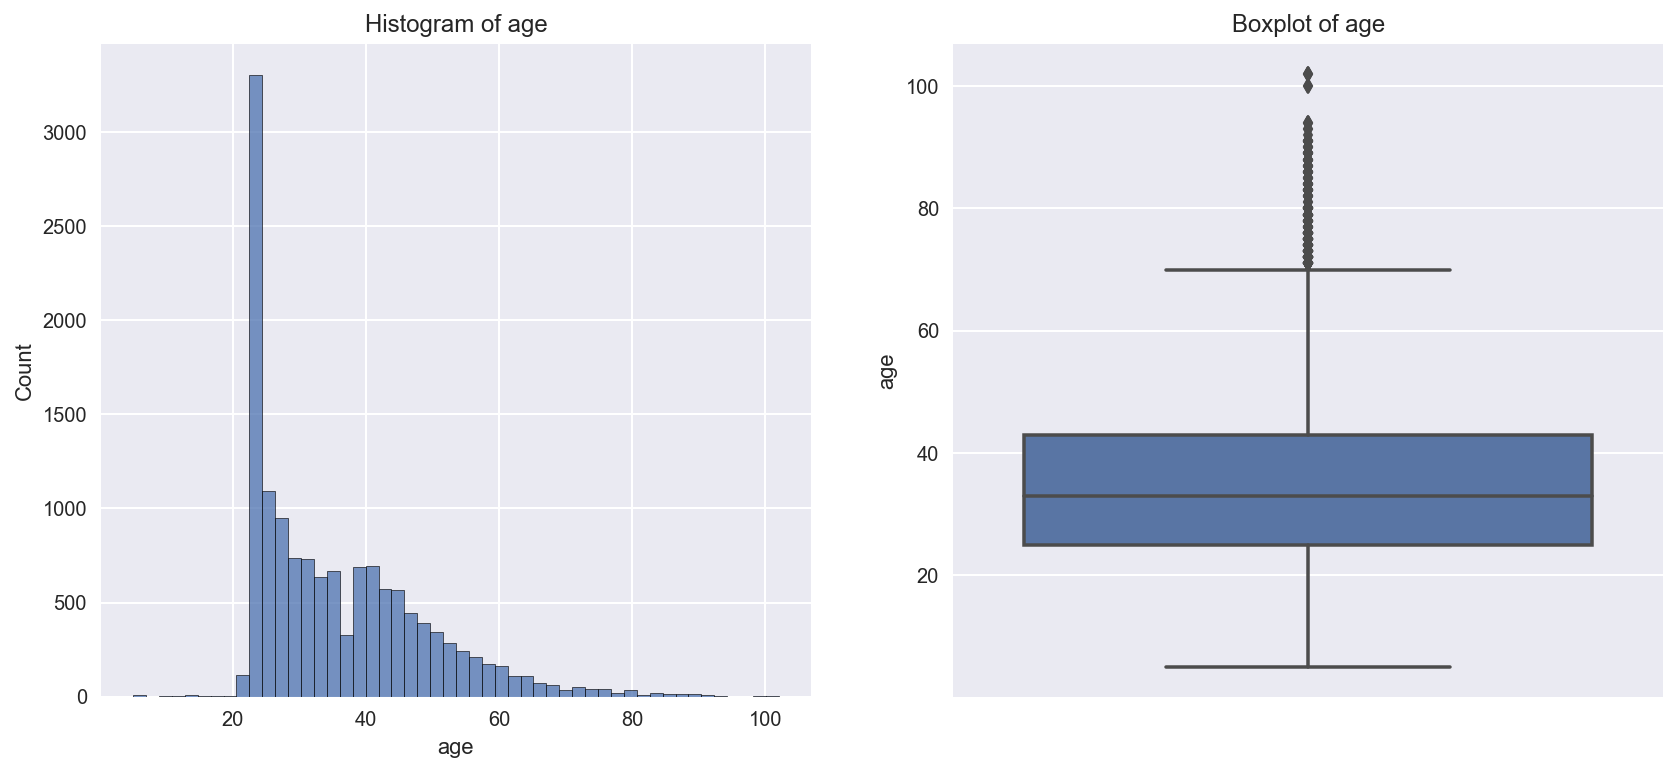

In [18]:
# using histogram and box plot to see the age
hist_box(df, 'age')

The age shows a right skewed distribution and it has many outliers.

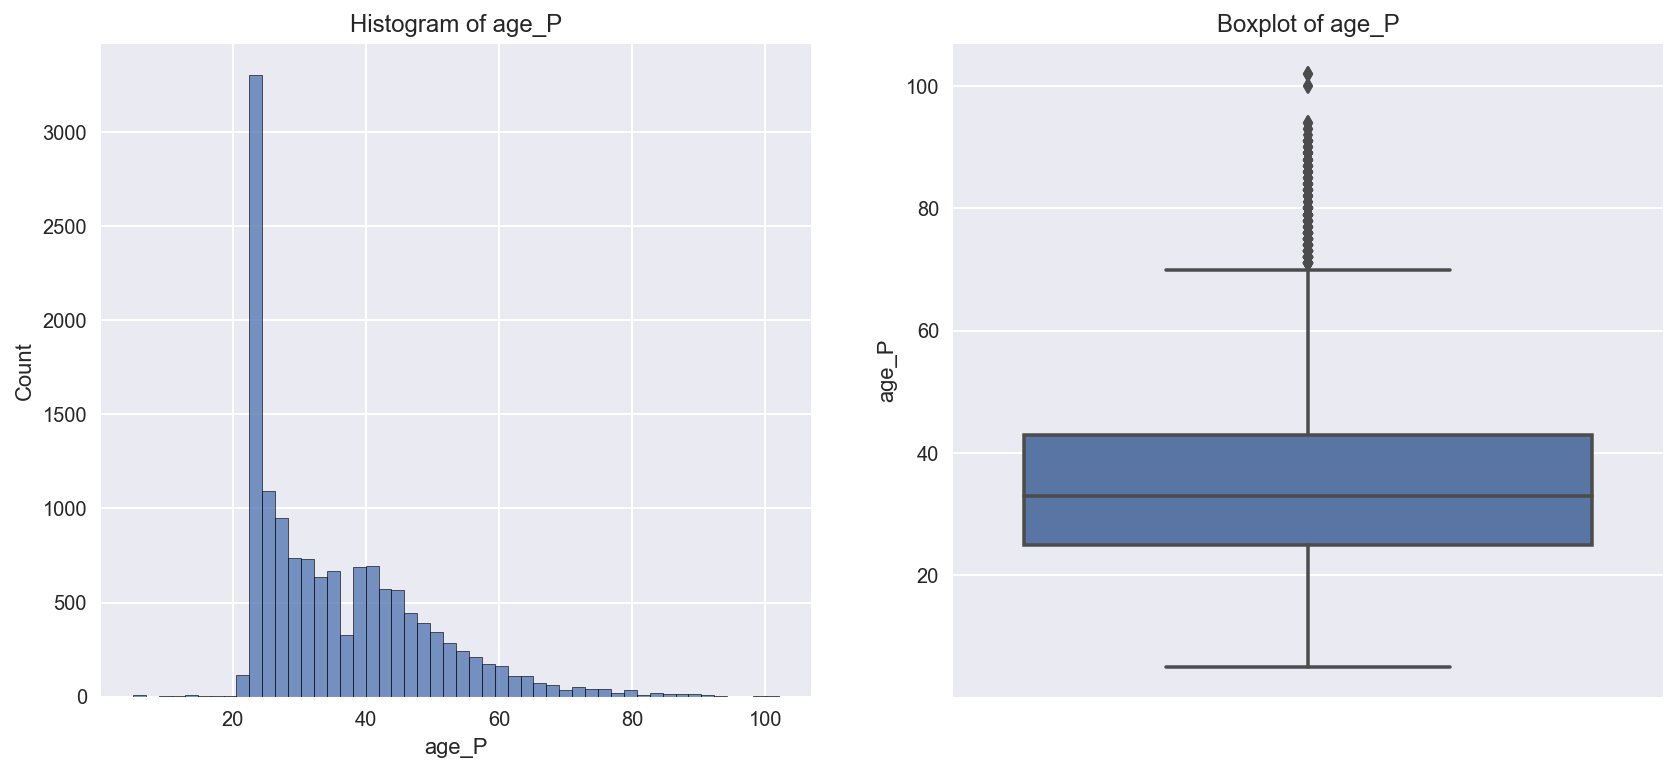

In [19]:
# age_P Age of partner in years
hist_box(df, 'age_P')

The age_P shows a right skewed distribution and it has many outliers.

In [20]:
# check multicollinearity
df[['age', 'age_P']].corr()

,age,age_P
age,1.0,1.0
age_P,1.0,1.0


age and age_P are present a same thing. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

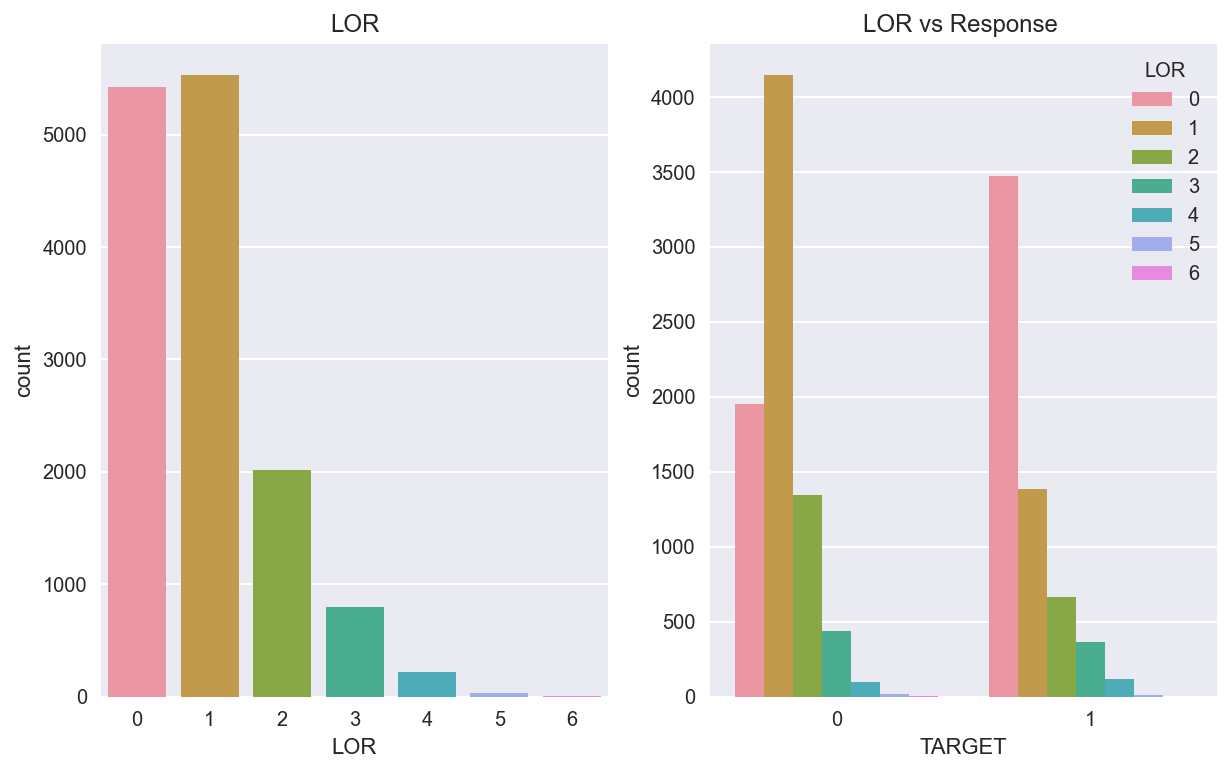

In [21]:
# LOR: Length of relationship in years
# using bar plot to see it
cate_vs_response_bars(df, 'LOR')

The LOR is a non-negative discrete COUNT value. It (Length of relationship in years) concentrates from 0 to 2 years. Customers who have 0 LOR will purchase more insurance than others. Also, comparing others, more customers who have 0 LOR would purchase insurances.

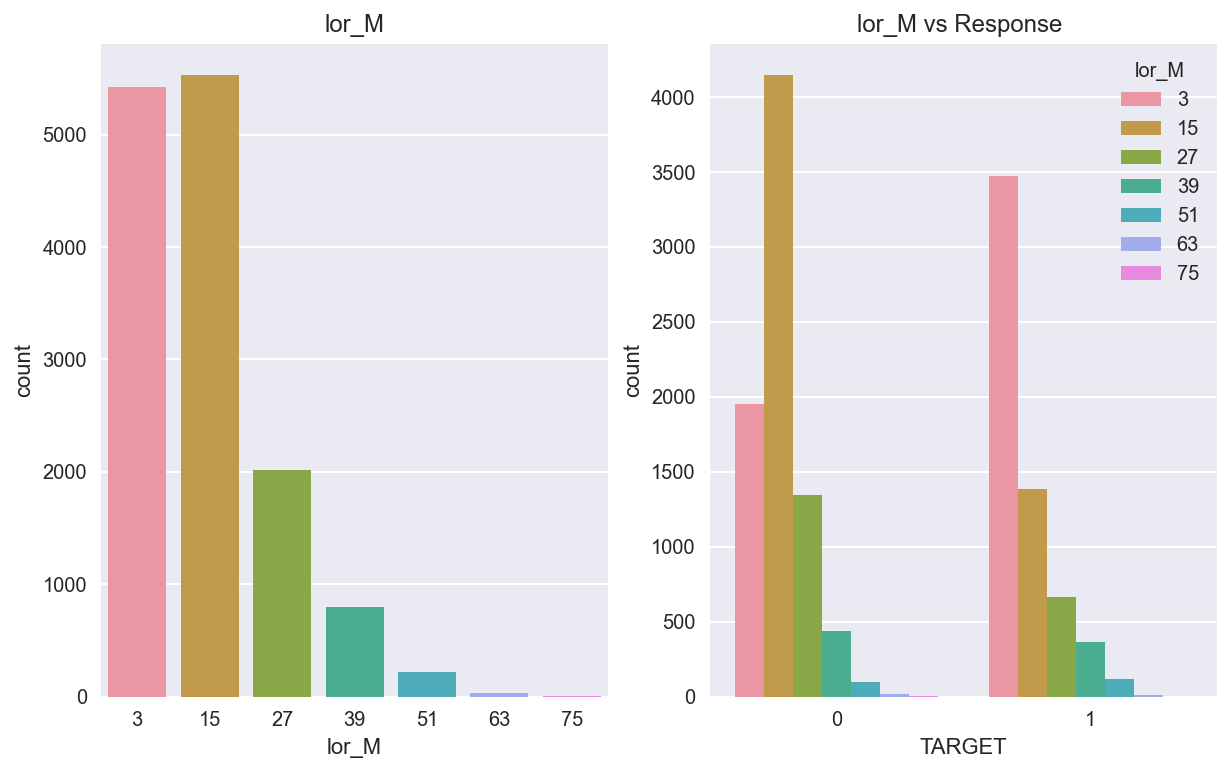

In [22]:
# lor_M Length of relationship in months
cate_vs_response_bars(df, 'lor_M')

The lor_M is a non-negative discrete COUNT value. It (Length of relationship in months) concentrates on 3 and 15 monthes. Customers who have 3 of lor_M will purchase more insurance than others. Also, comparing others, more customers who have 3 of lor_M would purchase insurances.

In [23]:
df[['LOR', 'lor_M']].corr()

,LOR,lor_M
LOR,1.0,1.0
lor_M,1.0,1.0


LOR and lor_M are present a same thing. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

<AxesSubplot:>

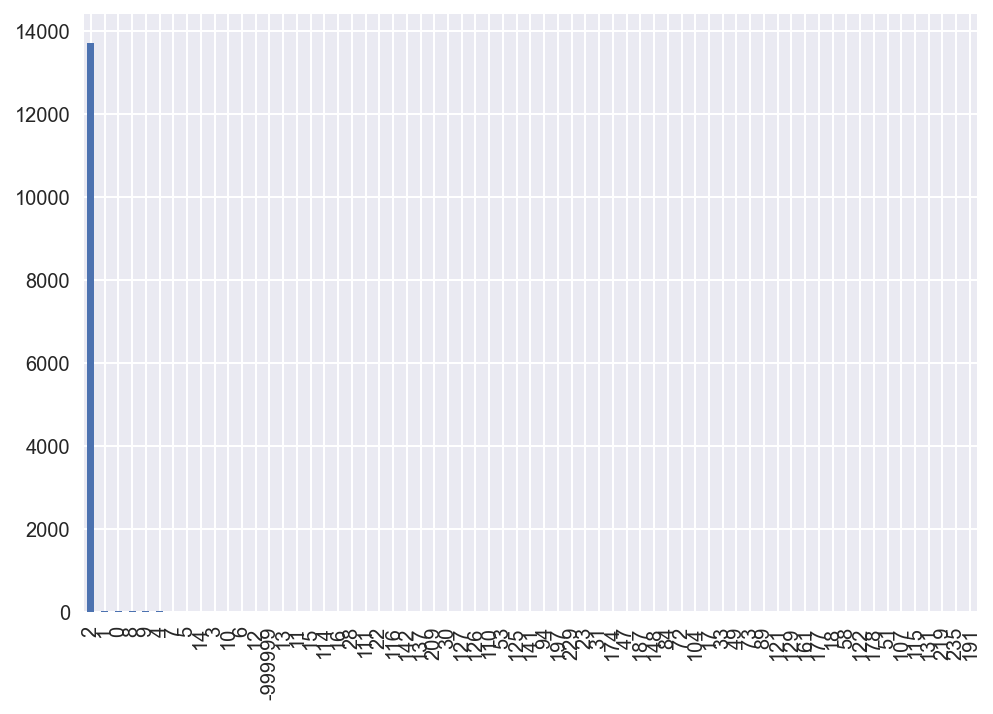

In [24]:
# use bar chart to see the city
df['city'].value_counts().plot.bar()

In [25]:
display_html_ratio_table(df['city'])

name,count,ratio
2,13720,0.9789
1,28,0.0020
0,26,0.0019
8,21,0.0015
9,20,0.0014
4,19,0.0014
7,15,0.0011
5,15,0.0011
14,13,0.0009
3,12,0.0009


The city 2 accounts for 97.89%. I'm going to merge the others into one type or drop them.

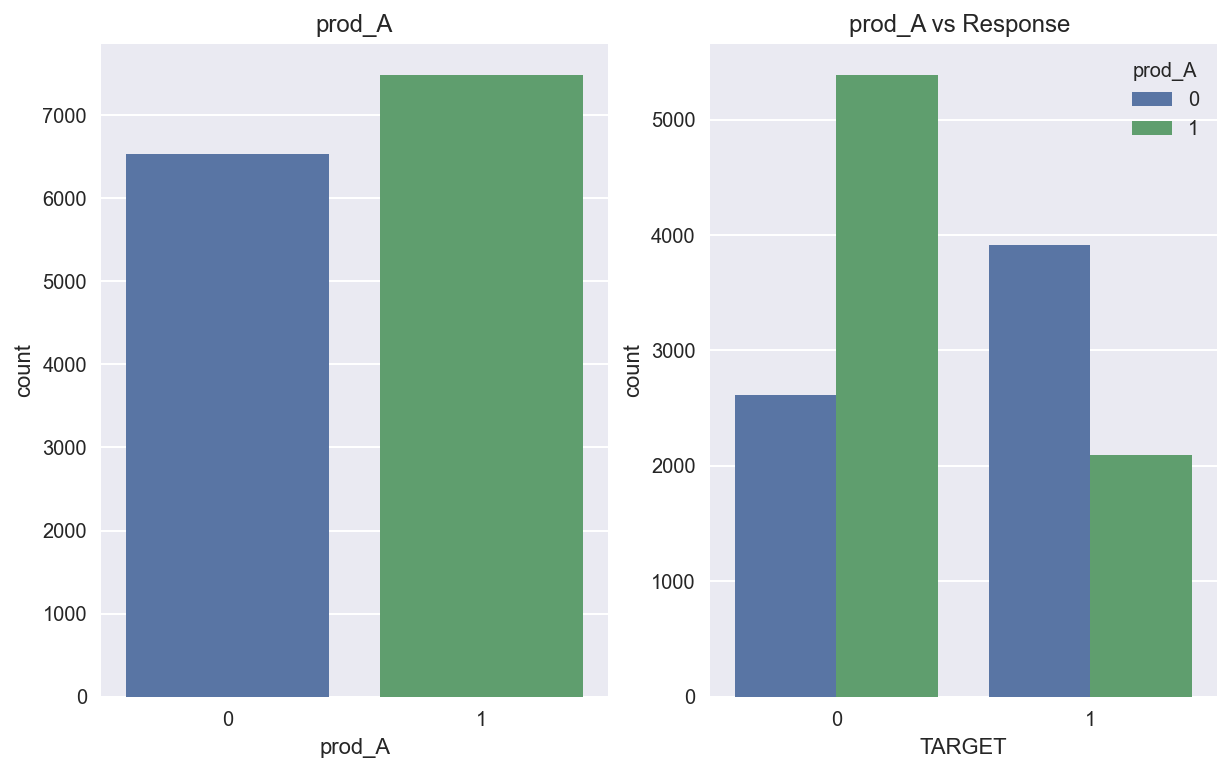

In [26]:
#prod_A Bought Product A (0=no, 1=yes)
# using bar plot to see prod_A
cate_vs_response_bars(df, 'prod_A')

In [27]:
display_html_ratio_table(df['prod_A'])

name,count,ratio
1,7482,0.5338
0,6534,0.4662


prod_A is a binary nominal category. The number of customers who buy 0 of product A is higher than who buy 1 of product A.

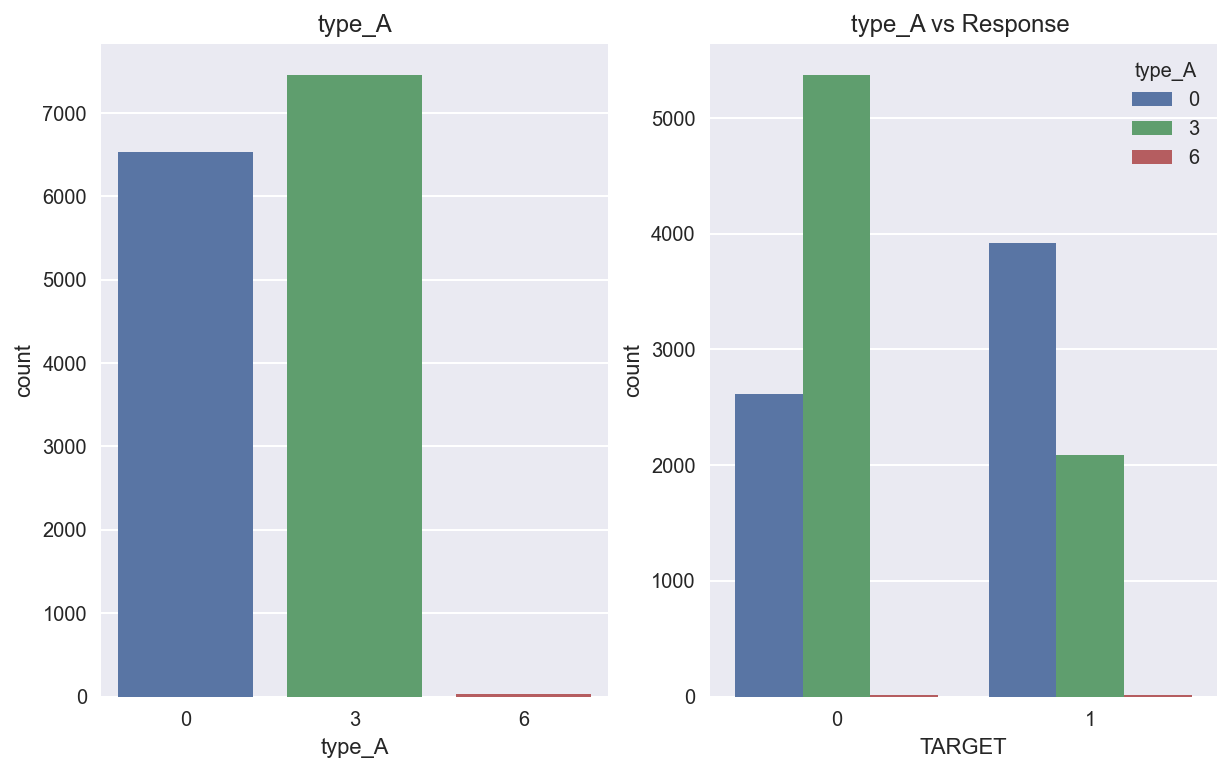

In [28]:
# type_A Type of product A
# using bar plot to see it
cate_vs_response_bars(df, 'type_A')

In [29]:
display_html_ratio_table(df['type_A'])

name,count,ratio
3,7452,0.5317
0,6534,0.4662
6,30,0.0021


type_A is a nominal category. The count of 6 of Type A is very low. Customers prefer to buy 0 of type_A more than others of type_A

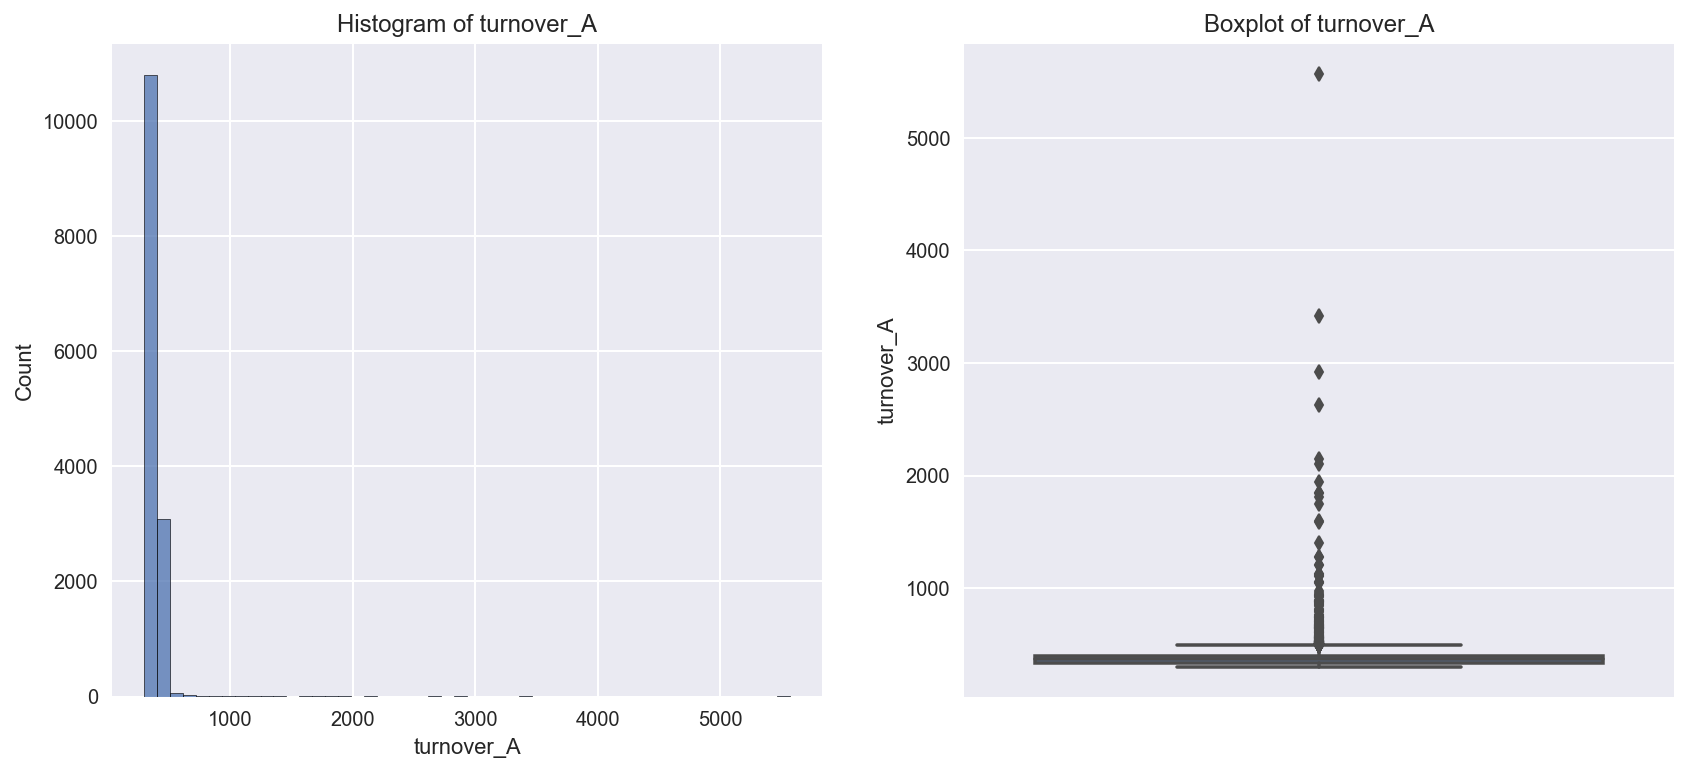

In [30]:
#turnover_A Amount of money spent on Product A
# using histogram and box plot to see it
hist_box(df, 'turnover_A')

In [31]:
df['turnover_A'].describe()

count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64

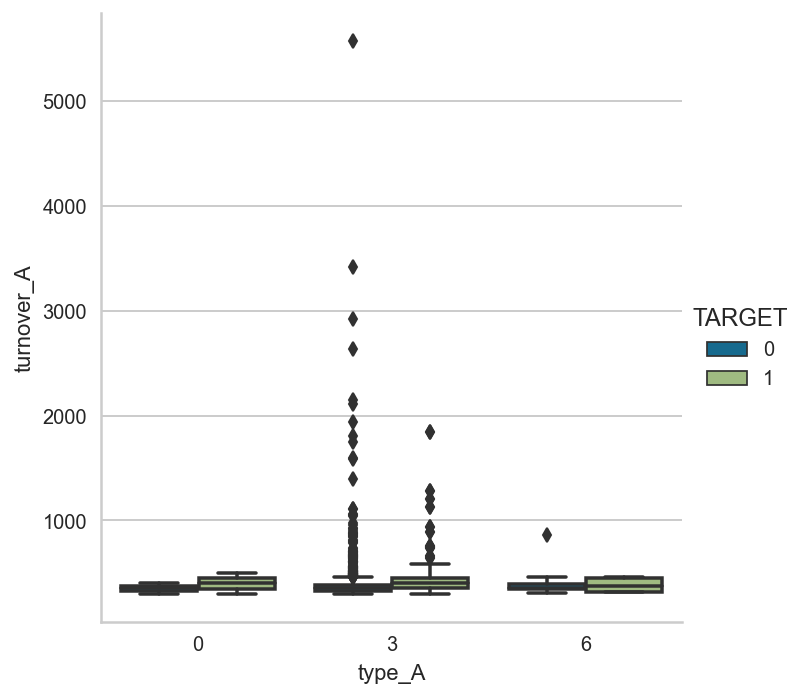

In [146]:
sns.catplot(x="type_A", y="turnover_A", hue = 'TARGET', data=df, kind="box")

turnover_A shows right skewed distribution. 75% of data are lower than 399.74. It has many outliers. Customers purchased 3 of type_A have more outliers than customers purchased others of type_A. Customers purchased 6 of type_B have wider range of Q1 and Q3 than others.

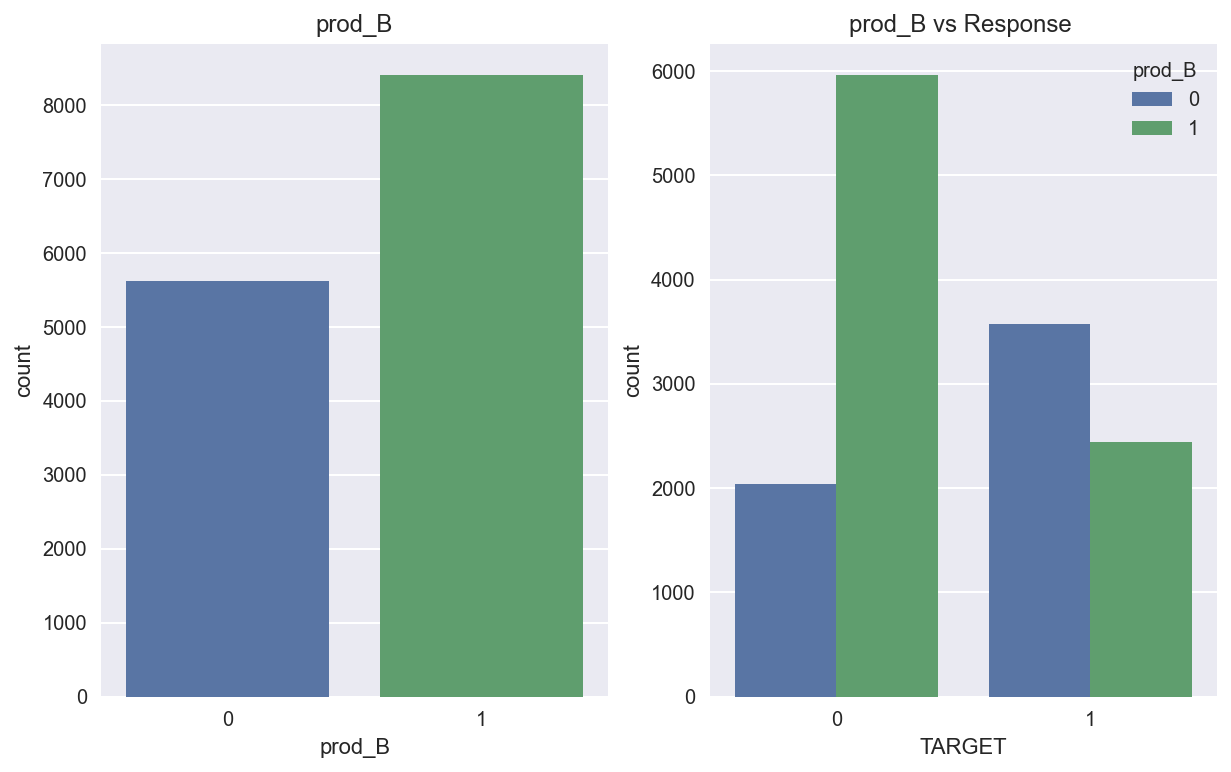

In [32]:
#prod_A Bought Product B (0=no, 1=yes)
# using bar plot to see prod_B
cate_vs_response_bars(df, 'prod_B')

In [33]:
display_html_ratio_table(df['prod_B'])

name,count,ratio
1,8402,0.5995
0,5614,0.4005


prod_B is a binary nominal category. Customers prefer to buy 0 of prod_B more than 1 of prod_B

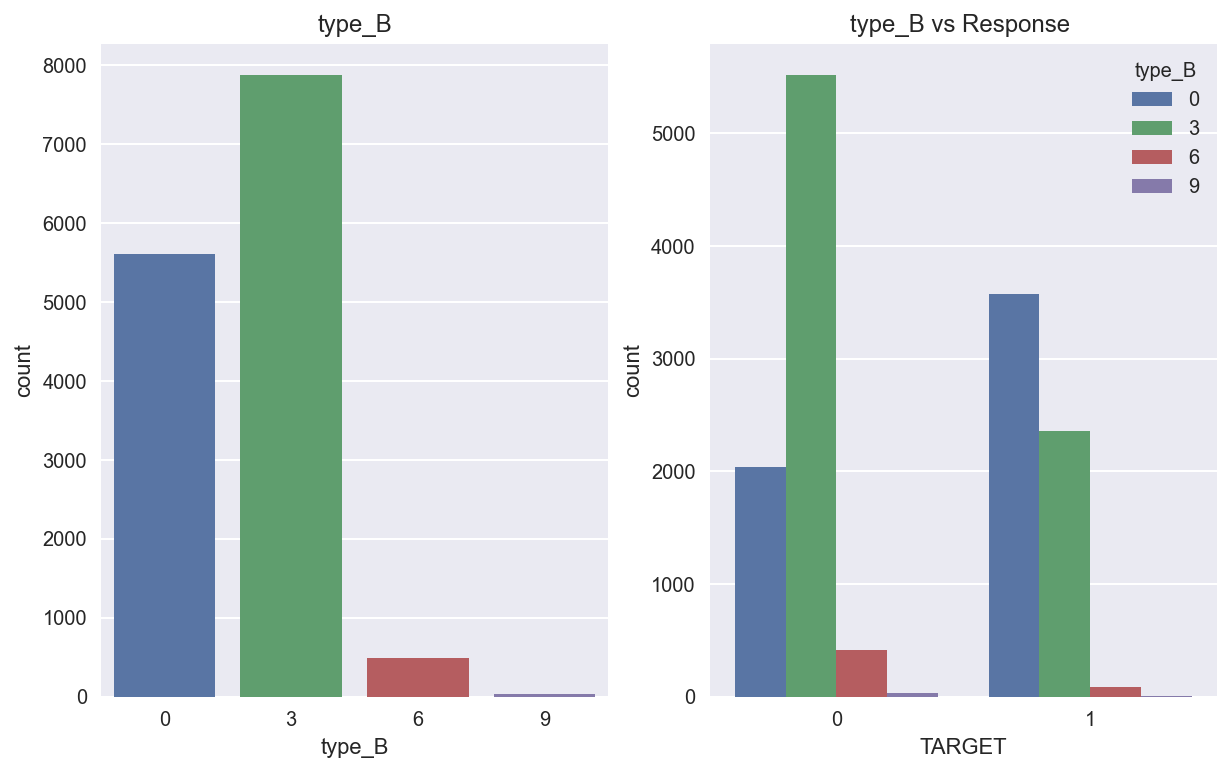

In [34]:
# type_B Type of product B
# using bar plot to see it
cate_vs_response_bars(df, 'type_B')

In [35]:
display_html_ratio_table(df['type_B'])

name,count,ratio
3,7874,0.5618
0,5614,0.4005
6,493,0.0352
9,35,0.0025


type_B is a nominal category. The count of 6 and 9 of Type B is very low. Customers prefer to buy 0 of type_B more than others of type_B

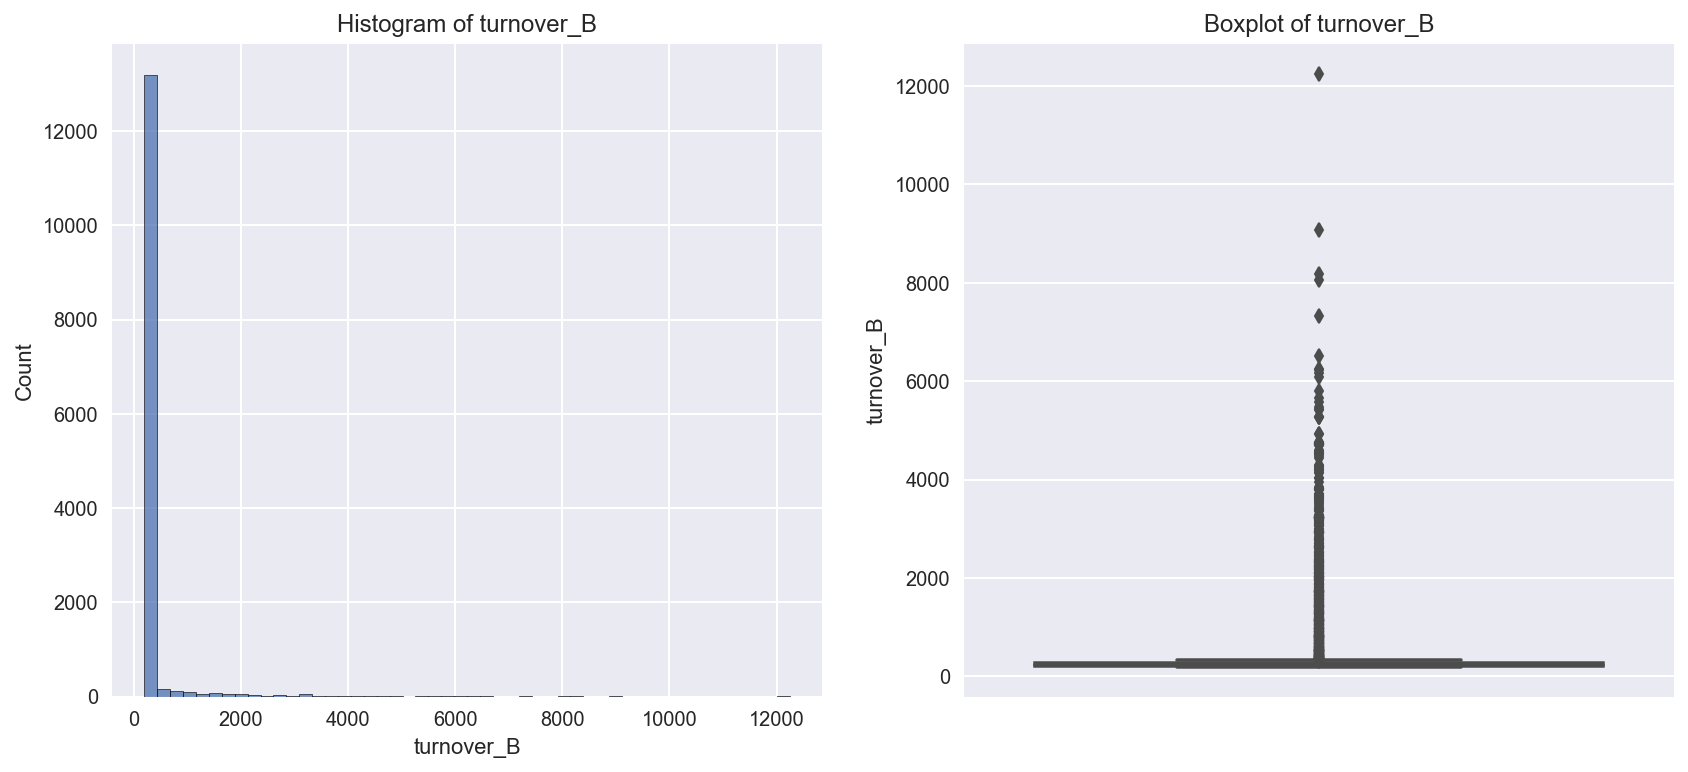

In [36]:
#turnover_A Amount of money spent on Product B
# using histogram and box plot to see it
hist_box(df, 'turnover_B')

In [37]:
df['turnover_B'].describe()

count    14016.000000
mean       328.628207
std        475.616525
min        191.962852
25%        219.406925
50%        237.656757
75%        264.131538
max      12249.084770
Name: turnover_B, dtype: float64

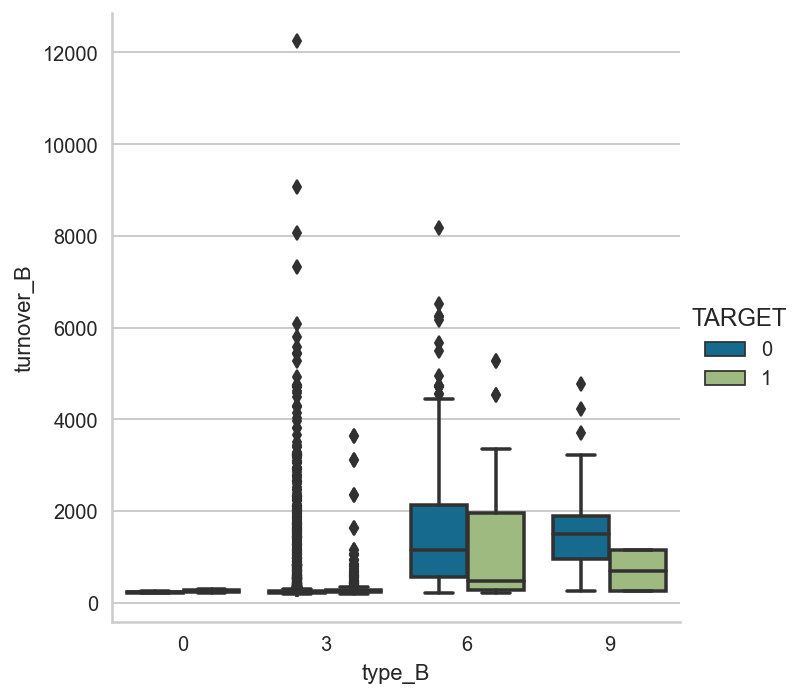

In [144]:
sns.catplot(x="type_B", y="turnover_B", hue = 'TARGET', data=df, kind="box")

turnover_B shows right skewed distribution. 75% of data are lower than 264.13. It has many outliers. Customers purchased 3 of type_B have more outliers than customers purchased others of type_B. Customers purchased 6 of type_B have wider range of Q1 and Q3 than others.

<AxesSubplot:>

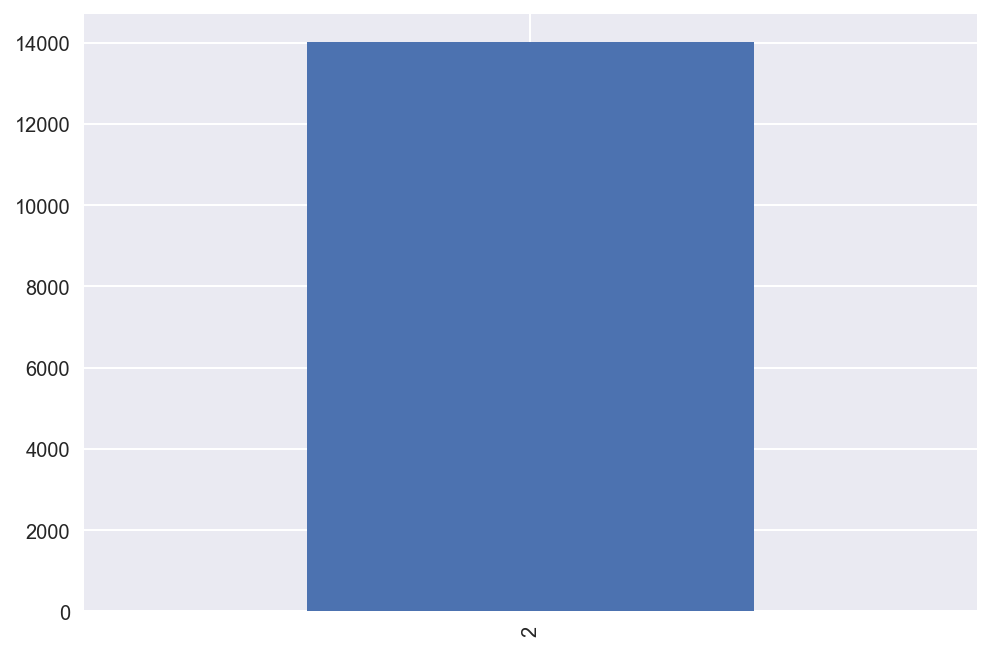

In [38]:
# contract Type of contract
# using bar plot to see it
df['contract'].value_counts().plot.bar()

In [39]:
display_html_ratio_table(df['contract'])

name,count,ratio
2,14016,1.0000


contract has only one value. It can be ignored. I will drop it in the data preparation.

#### Define the types of all variables

In [40]:
# response column
response_col = ['TARGET']

# all number columns
num_cols = ['turnover_A', 'turnover_B', 'age', 'age_P', 'LOR', 'lor_M', 'loyalty']

# all categorical columns
cat_cols =  ['city',  'type_A', 'prod_A', 'type_B', 'prod_B']

#### heatmap checks correlation and multicollinearity

y = dependent variable (TARGET)

<AxesSubplot:>

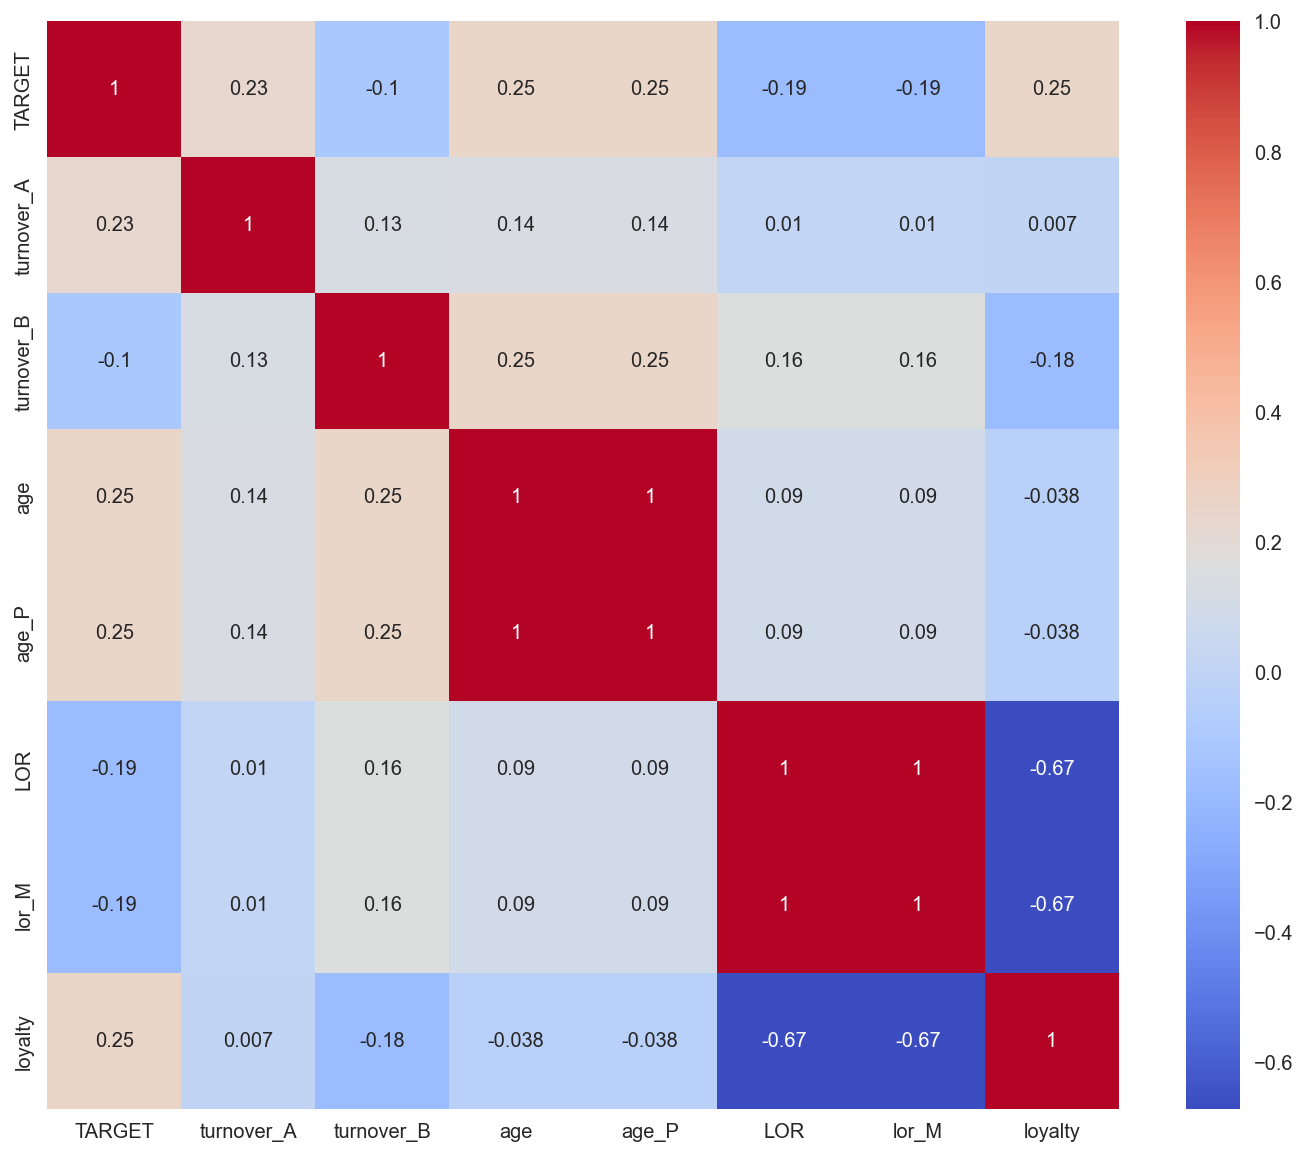

In [41]:
cm = df[response_col + num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm')

LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

### Summary

Variables need to be converted:

- Target： It is binary response. I wil convert N to 0 and Y to 1, in the data preparation step.


Variables need to be dropped:

- LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- ID is users' identification. It should not be a explanary. I will drop it in data preparation.
- contract has only one value. It can be ignored. I will drop it in the data preparation.


Values of variable need to be merged:

- The city 2 accounts for 97.89%. I'm going to merge the others into one type.


Numerical variabels:

- The age shows a right skewed distribution and it has many outliers.
- turnover_A shows right skewed distribution. It has many outliers.
- turnover_B shows right skewed distribution. It has many outliers.

non-negative discrete COUNT value: They should be used as numerical variables.
- LOR
- lor_M

Ordinary category
- loyalty：It is an ordinary category. The ordinary category should not be used as nominal category. It should be used as numerical variables.

Categorical variabels: They need to convert to category type.
- city
- type_A Type of product A
- type_B Type of product B

Binary categories: They do not need to do dummy process.
- prod_A Bought Product A (0=no, 1=yes)
- prod_B Bought Product B (0=no, 1=yes)

# 4. Data Preparation
Select sub set without useless variables.

Check duplicate

Convert data type

Drop outliers

Split train and test sets & standardization

Over sampling

Dummy the nominal categories

### Check duplications

In [42]:
# To check whether there are duplicated rows in the data set
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    11008
True      3008
dtype: int64

The data set has 3008 duplicated rows. Next I will explore these duplicates.

In [43]:
# fetch and show the duplicates
duplicates_df = df[dup_rows]

print(duplicates_df.shape)
duplicates_df.head(3)

(3008, 15)


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
11010,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27


In [44]:
# see duplicates by duplicated ID
df[(df['ID'] == 77)] 

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3


In [45]:
# see duplicates by duplicated ID
df[(df['ID'] == 220)] 

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
2,1,1,220,42,2,2,1,3,6,1,342.18099,1175.589721,2,42,27
11010,1,1,220,42,2,2,1,3,6,1,342.18099,1175.589721,2,42,27


#### Drop these duplicates

Drop the last duplicate, keep the first one.

In [46]:
no_duplicates_df = df.drop_duplicates(keep='first', inplace=False)

In [47]:
no_duplicates_df.shape

(11008, 15)

### Select sub set without useless variables.

In the new sub set, followed variables will be removed.

- LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- ID: IT is users' identification. It should not be a explanary. I will drop it in data preparation.
- contract: It has only one value. It can be ignored. I will drop it in the data preparation.

In [48]:
is_df = no_duplicates_df[['TARGET', 'loyalty', 'age', 'city', 'type_A', 'prod_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B',
       'lor_M']].copy()

print(is_df.shape)
is_df.head(5)

(11008, 11)


,TARGET,loyalty,age,city,type_A,prod_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,3,1,3,1,394.735699,284.904978,39
2,1,1,42,2,3,1,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


### Convert data to valid values

city: The city 2 accounts for 97.89%. I'm going to merge the others into one type.

In [49]:
is_df['city'] = is_df['city'].apply(lambda x: 'c_2' if x == 2 else 'other')

In [50]:
is_df['city'].value_counts()

c_2      10769
other      239
Name: city, dtype: int64

### Convert data type

- loyalty is an ordinal category. It is int now, so it does not need to convert.
- lor_M is a non-negative discrete COUNT value. It is int now, so it does not need to convert.
- prod_A and prod_B is binary nominal category. It is int now, so it does not need to convert.
- city, type_A, type_B need to convert into category

In [51]:
cat_cols = ['city', 'type_A', 'type_B']
for col in cat_cols:
    is_df[col] = is_df[col].astype("category")

In [52]:
# check data type
is_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 0 to 11007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TARGET      11008 non-null  int32   
 1   loyalty     11008 non-null  int64   
 2   age         11008 non-null  int64   
 3   city        11008 non-null  category
 4   type_A      11008 non-null  category
 5   prod_A      11008 non-null  int64   
 6   type_B      11008 non-null  category
 7   prod_B      11008 non-null  int64   
 8   turnover_A  11008 non-null  float64 
 9   turnover_B  11008 non-null  float64 
 10  lor_M       11008 non-null  int64   
dtypes: category(3), float64(2), int32(1), int64(5)
memory usage: 763.7 KB


### Drop outliers

In [53]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

#### check all outliers of numeric variables

In [54]:
num_cols = ['turnover_A', 'turnover_B', 'age']

In [55]:
# Getting outliers that larger than (mean + 3 * std).
del_3_sigema_outliers_df = drop_outliers(is_df, num_cols, 3.0)

There are 427 outliers that account for 3.88 %. They all large than (3.0 * std + mean) of column.


In [56]:
# copy a data set to test
del_test_df_3_sigema = is_df.copy()

In [57]:
# drop outliers
del_test_df_3_sigema.drop(del_3_sigema_outliers_df.index.values, inplace=True)

In [58]:
del_test_df_3_sigema.shape

(10581, 11)

In [59]:
# orginal data set
is_df[['turnover_A', 'turnover_B', 'age']].corr()

,turnover_A,turnover_B,age
turnover_A,1.000000,0.138260,0.130944
turnover_B,0.138260,1.000000,0.293546
age,0.130944,0.293546,1.000000


In [60]:
# without outliers data set
corr_matrix_3_sigema = del_test_df_3_sigema[['turnover_A', 'turnover_B', 'age']].corr()
corr_matrix_3_sigema

,turnover_A,turnover_B,age
turnover_A,1.000000,0.027238,0.191498
turnover_B,0.027238,1.000000,0.242189
age,0.191498,0.242189,1.000000


The above correlation tables show that the correlation decrease for data set without outliers, but the decrease is acceptable.

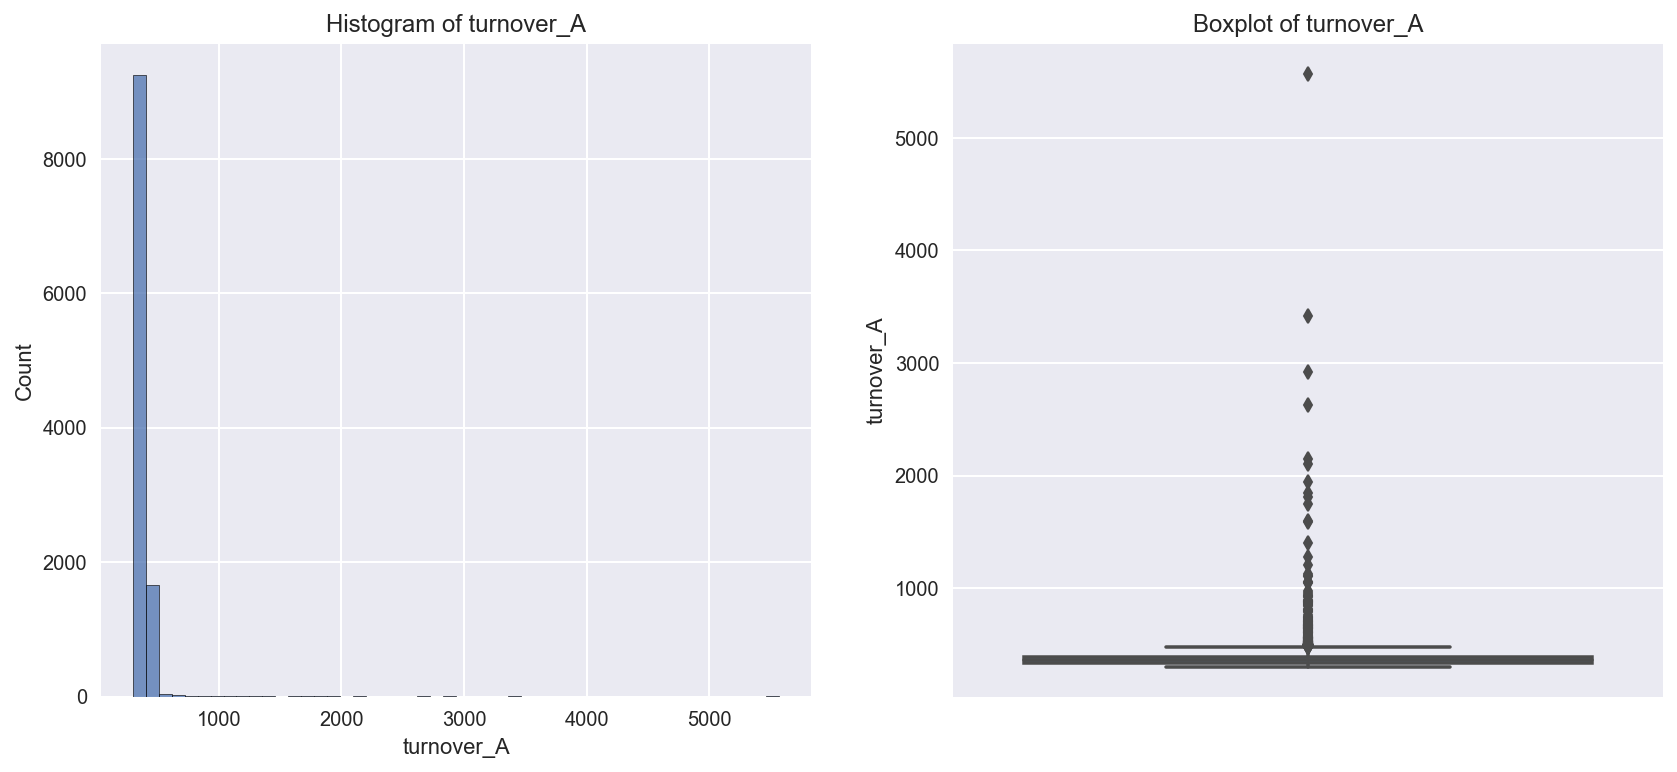

In [61]:
# Original data set with outliers
hist_box(is_df, 'turnover_A')

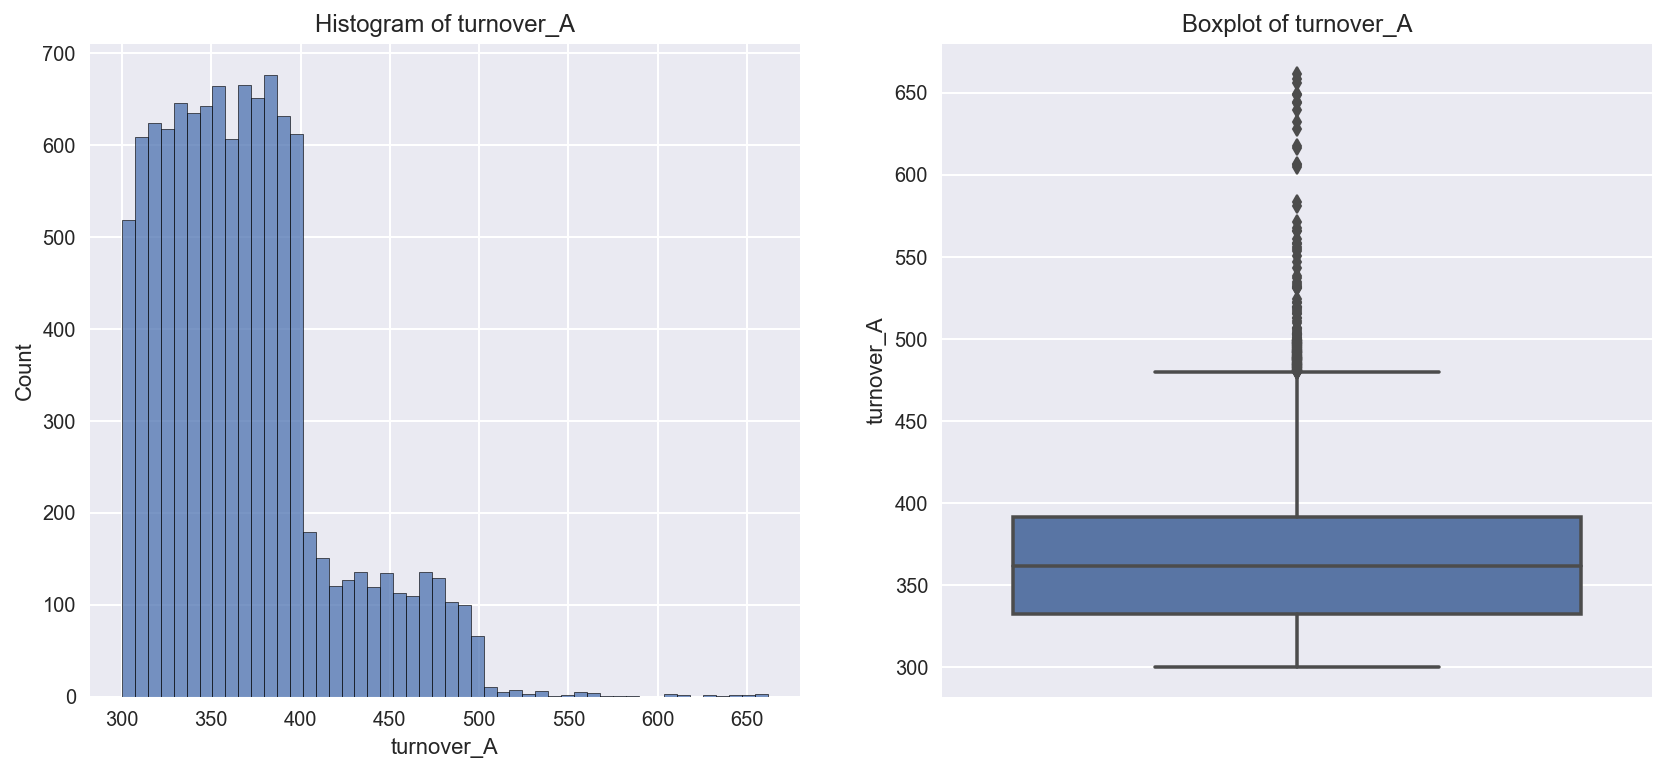

In [62]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'turnover_A')

The above histograms and box plots show that turnover_A without outliers become more concentration. The max value dorpped from near 6000 to around 1800.

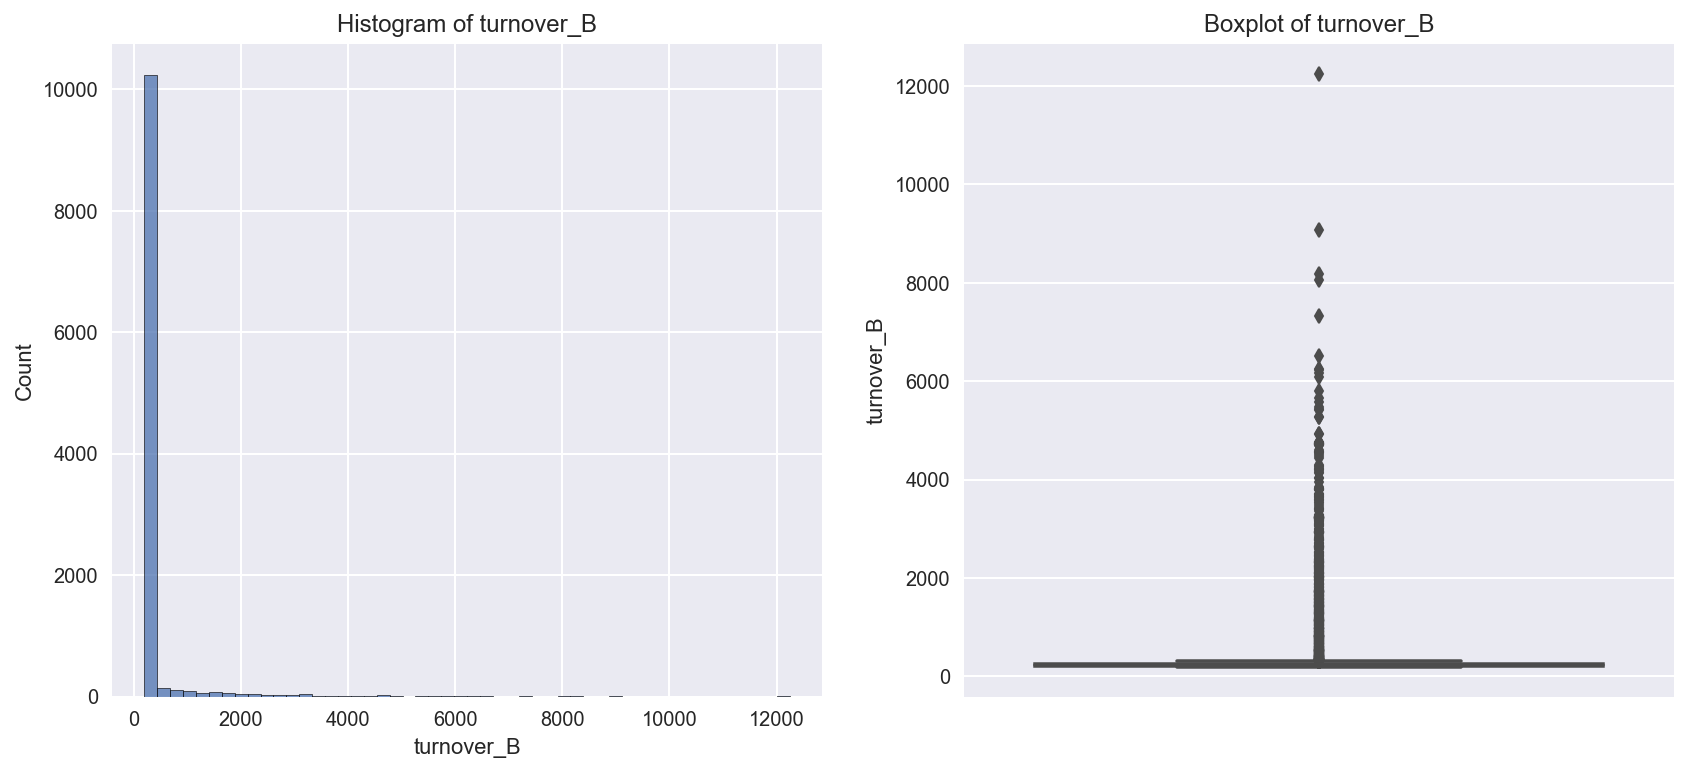

In [63]:
# Original data set with outliers
hist_box(is_df, 'turnover_B')

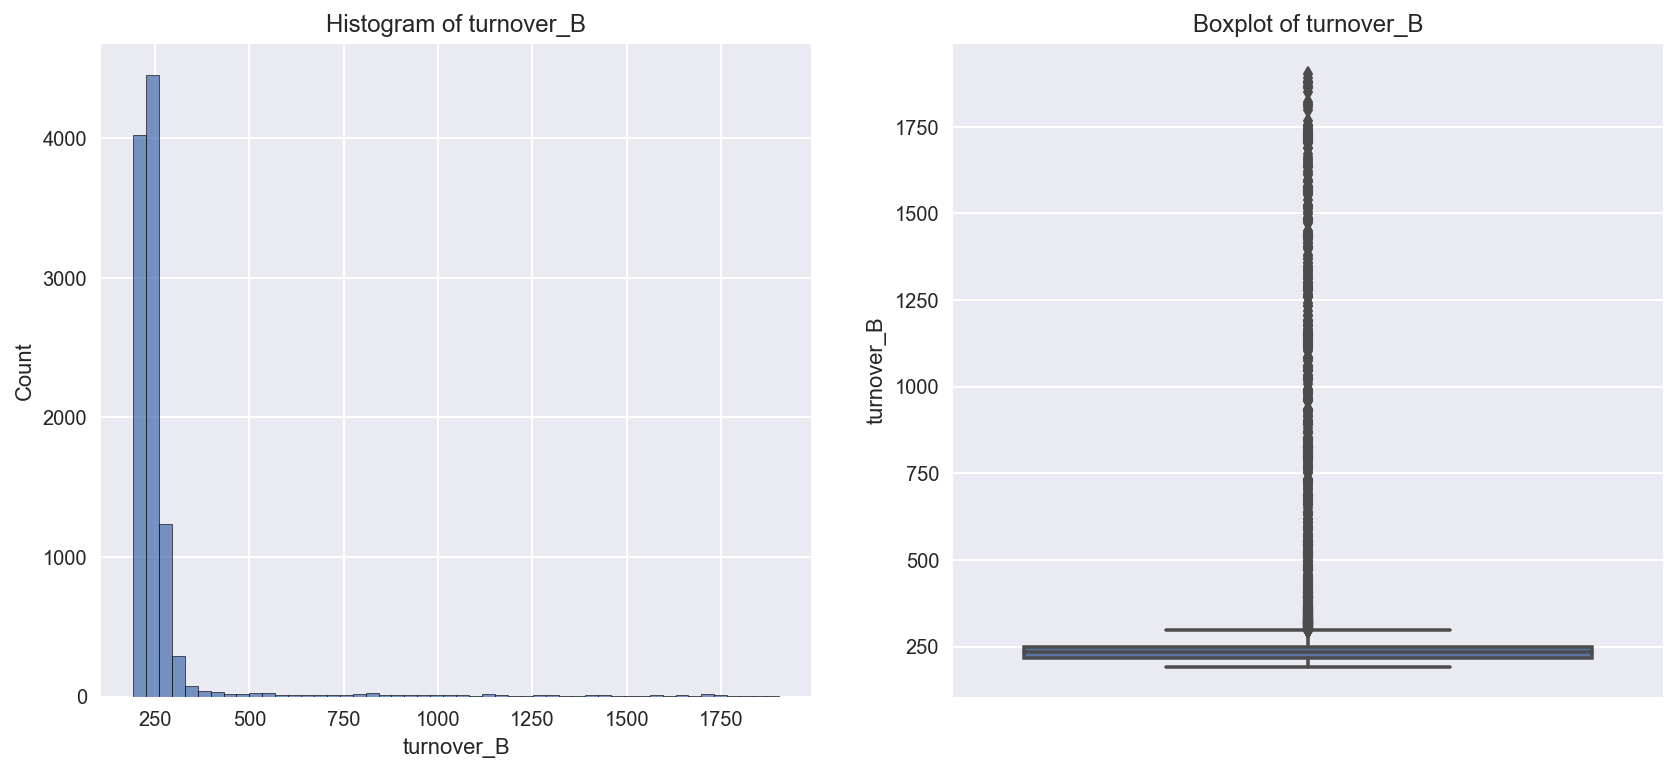

In [64]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'turnover_B')

The above histograms and box plots show that turnover_B without outliers become more concentration. The max value dorpped from around 12000 to around 5000.

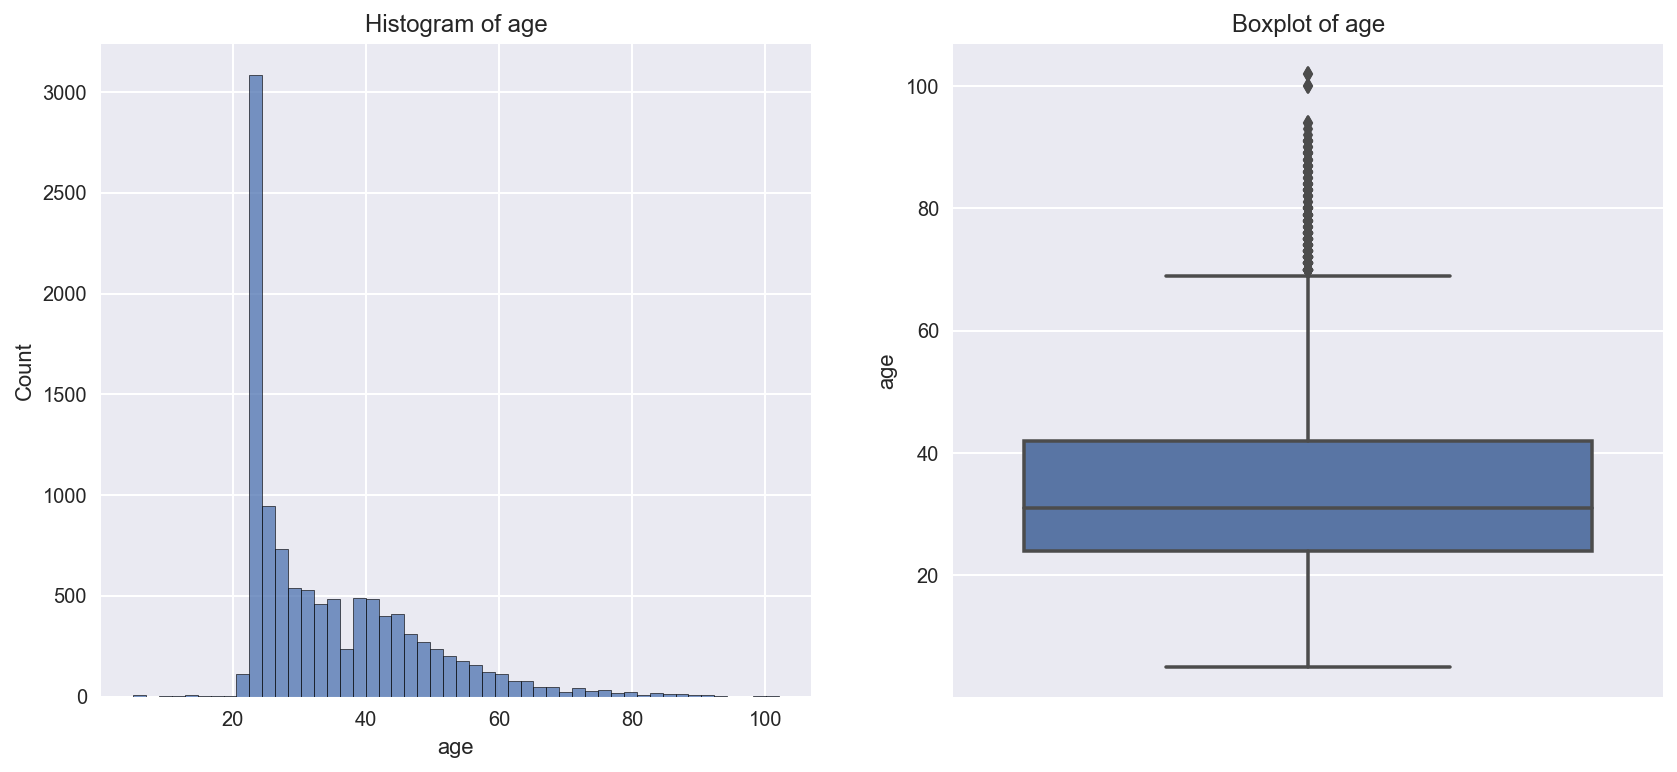

In [65]:
# Original data set with outliers
hist_box(is_df, 'age')

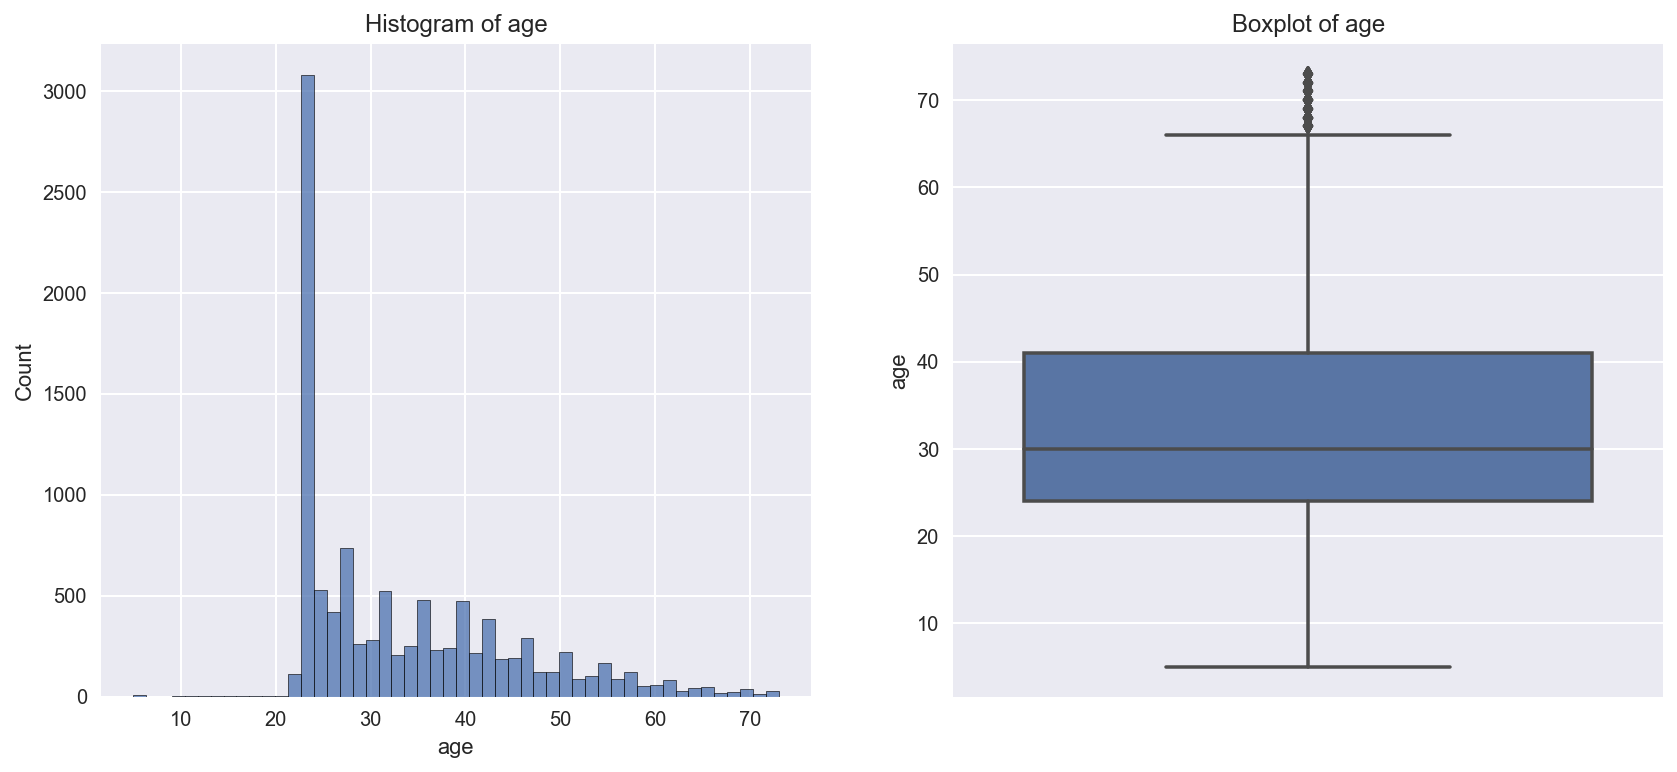

In [66]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'age')

In [67]:
display_html_statistic_table(is_df, del_test_df_3_sigema, title1="with outliers",
                             title2 = "droped outliers", col="age")

age,with outliers,droped outliers
count,11008,10581
mean,34.8452,33.7636
std,13.0328,11.5492
min,5.0000,5.0000
25%,24.0000,24.0000
50%,31.0000,30.0000
75%,42.0000,41.0000
max,102.0000,73.0000


The above histograms, box plots, and description table show that age without outliers does not have obviously change.

#### I will drop outliers with (mean + 3 * std)

In [68]:
prepared_is_df = del_test_df_3_sigema.copy()
prepared_is_df.shape

(10581, 11)

### Split train and test sets
- Split data set & standardization

Split data set & normalization & standardization
Usually, I use StandardScaler to convert data from different scales to the same scales. Variables with same scales can get a good accurate when training a model.

If variables of data have many outliers, RobustScaler can solve outliers better than StandardScaler.

In [69]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    cols = X.columns
    
    if std_cols:
        std = preprocessing.StandardScaler()
        
        # RobustScaler can solve outliers better than StandardScaler
        #std = preprocessing.RobustScaler()
        
        fitted = std.fit_transform(X_train[std_cols])
        
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        
        test_fit = std.transform(X_test[std_cols])
        
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [70]:
# response column
response_col = ['TARGET']

# all number columns
num_cols = ['loyalty','turnover_A', 'turnover_B', 'age', 'lor_M', ]

# all categorical columns
cat_cols =  [ 'city', 'type_A', 'type_B']

# all binary nominal categorical columns
binary_cat_cols = ['prod_B', 'prod_A']

In [71]:
# Create train and test set
X_train, X_test, y_train, y_test = get_train_test_X_y(prepared_is_df, "TARGET", std_cols=num_cols)

# check X_train
X_train.shape

(7406, 10)

### Over sampling

It is an imbalance response. Before I start training models, I will resample the response.

In [72]:
prepared_is_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10581 entries, 0 to 11007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TARGET      10581 non-null  int32   
 1   loyalty     10581 non-null  int64   
 2   age         10581 non-null  int64   
 3   city        10581 non-null  category
 4   type_A      10581 non-null  category
 5   prod_A      10581 non-null  int64   
 6   type_B      10581 non-null  category
 7   prod_B      10581 non-null  int64   
 8   turnover_A  10581 non-null  float64 
 9   turnover_B  10581 non-null  float64 
 10  lor_M       10581 non-null  int64   
dtypes: category(3), float64(2), int32(1), int64(5)
memory usage: 734.1 KB


In [73]:
y_train.value_counts()

0    5342
1    2064
Name: TARGET, dtype: int64

In [74]:
X_train[:3]

,loyalty,age,city,type_A,prod_A,type_B,prod_B,turnover_A,turnover_B,lor_M
7660,1.059175,-0.933091,c_2,3,1,3,1,-0.130602,-0.282623,0.040241
2912,1.059175,-0.071028,c_2,0,0,0,0,2.058967,-0.081331,-1.027960
9528,1.059175,2.601369,other,0,0,0,0,0.132223,-0.184974,0.040241


In [75]:
# import lib
import imblearn
# import over sample method
from imblearn.over_sampling import SMOTENC

# use category + numeric method to run the over sampling

# [2, 3, 5] are indexs of ['city', 'type_A', 'type_B']
smote_nc = SMOTENC(categorical_features=[2, 3, 5], random_state=13)
X_smo, y_smo = smote_nc.fit_resample(X_train, y_train)

In [76]:
# Check the number of two types for Response variable
y_smo.value_counts()

0    5342
1    5342
Name: TARGET, dtype: int64

#### Dummy nominal categories

In [77]:
# Dummy the categorival variables
X_dummy_smo = pd.get_dummies(X_smo)
X_dummy_smo.head(3)

,loyalty,age,prod_A,prod_B,turnover_A,turnover_B,lor_M,city_c_2,city_other,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1.059175,-0.933091,1,1,-0.130602,-0.282623,0.040241,1,0,0,1,0,0,1,0,0
1,1.059175,-0.071028,0,0,2.058967,-0.081331,-1.027960,1,0,1,0,0,1,0,0,0
2,1.059175,2.601369,0,0,0.132223,-0.184974,0.040241,0,1,1,0,0,1,0,0,0


In [78]:
# set value to X_train_dummy & y_train
X_train_dummy = X_dummy_smo
y_train = y_smo

In [79]:
X_train_dummy.columns

Index(['loyalty', 'age', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'lor_M', 'city_c_2', 'city_other', 'type_A_0', 'type_A_3', 'type_A_6',
       'type_B_0', 'type_B_3', 'type_B_6', 'type_B_9'],
      dtype='object')

In [80]:
# dummy the test set
X_test_dummy = pd.get_dummies(X_test)
X_test_dummy.head(3)

,loyalty,age,prod_A,prod_B,turnover_A,turnover_B,lor_M,city_c_2,city_other,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
5529,1.059175,-0.760678,0,0,-0.941045,-0.300119,-1.027960,1,0,1,0,0,1,0,0,0
9228,1.059175,-0.933091,1,1,-0.796115,-0.374235,0.040241,1,0,0,1,0,0,1,0,0
9987,-0.966876,-0.071028,1,1,-0.920629,-0.131261,0.040241,1,0,0,1,0,0,1,0,0


### Summary
In the data preparation, I finished the following processes:

- Select sub set without useless variables.

- Check duplicate

- Convert data type

- Drop outliers

- Split train and test sets & Standardization

- Over sampling

- Dummy the nominal categories

# 5. Prepped Data Review (Re-run Exploratory Data Analysis)

In [81]:
# response column
response_col = ['TARGET']

# all number columns
num_cols = ['age', 'turnover_A', 'turnover_B', 'loyalty', 'lor_M']

# all categorical columns
cat_cols =  ['prod_A', 'prod_B', 'city_c_2', 'city_other', 'type_A_0', 'type_A_3', 'type_A_6',
       'type_B_0', 'type_B_3', 'type_B_6', 'type_B_9']

In [82]:
X_train_dummy[num_cols].describe()

,age,turnover_A,turnover_B,loyalty,lor_M
count,10684.000000,10684.000000,10684.000000,10684.000000,10684.000000
mean,0.132290,0.212312,-0.027554,0.106245,-0.087049
std,0.998455,1.110931,0.847479,1.000813,1.030807
min,-2.484805,-1.427602,-0.422234,-0.987550,-1.027960
25%,-0.760678,-0.673074,-0.277056,-0.946202,-1.027960
50%,-0.071028,0.048793,-0.179184,1.059175,0.040241
75%,0.791036,0.807941,-0.046987,1.059175,0.040241
max,3.377226,6.150658,8.739251,1.059175,5.381248


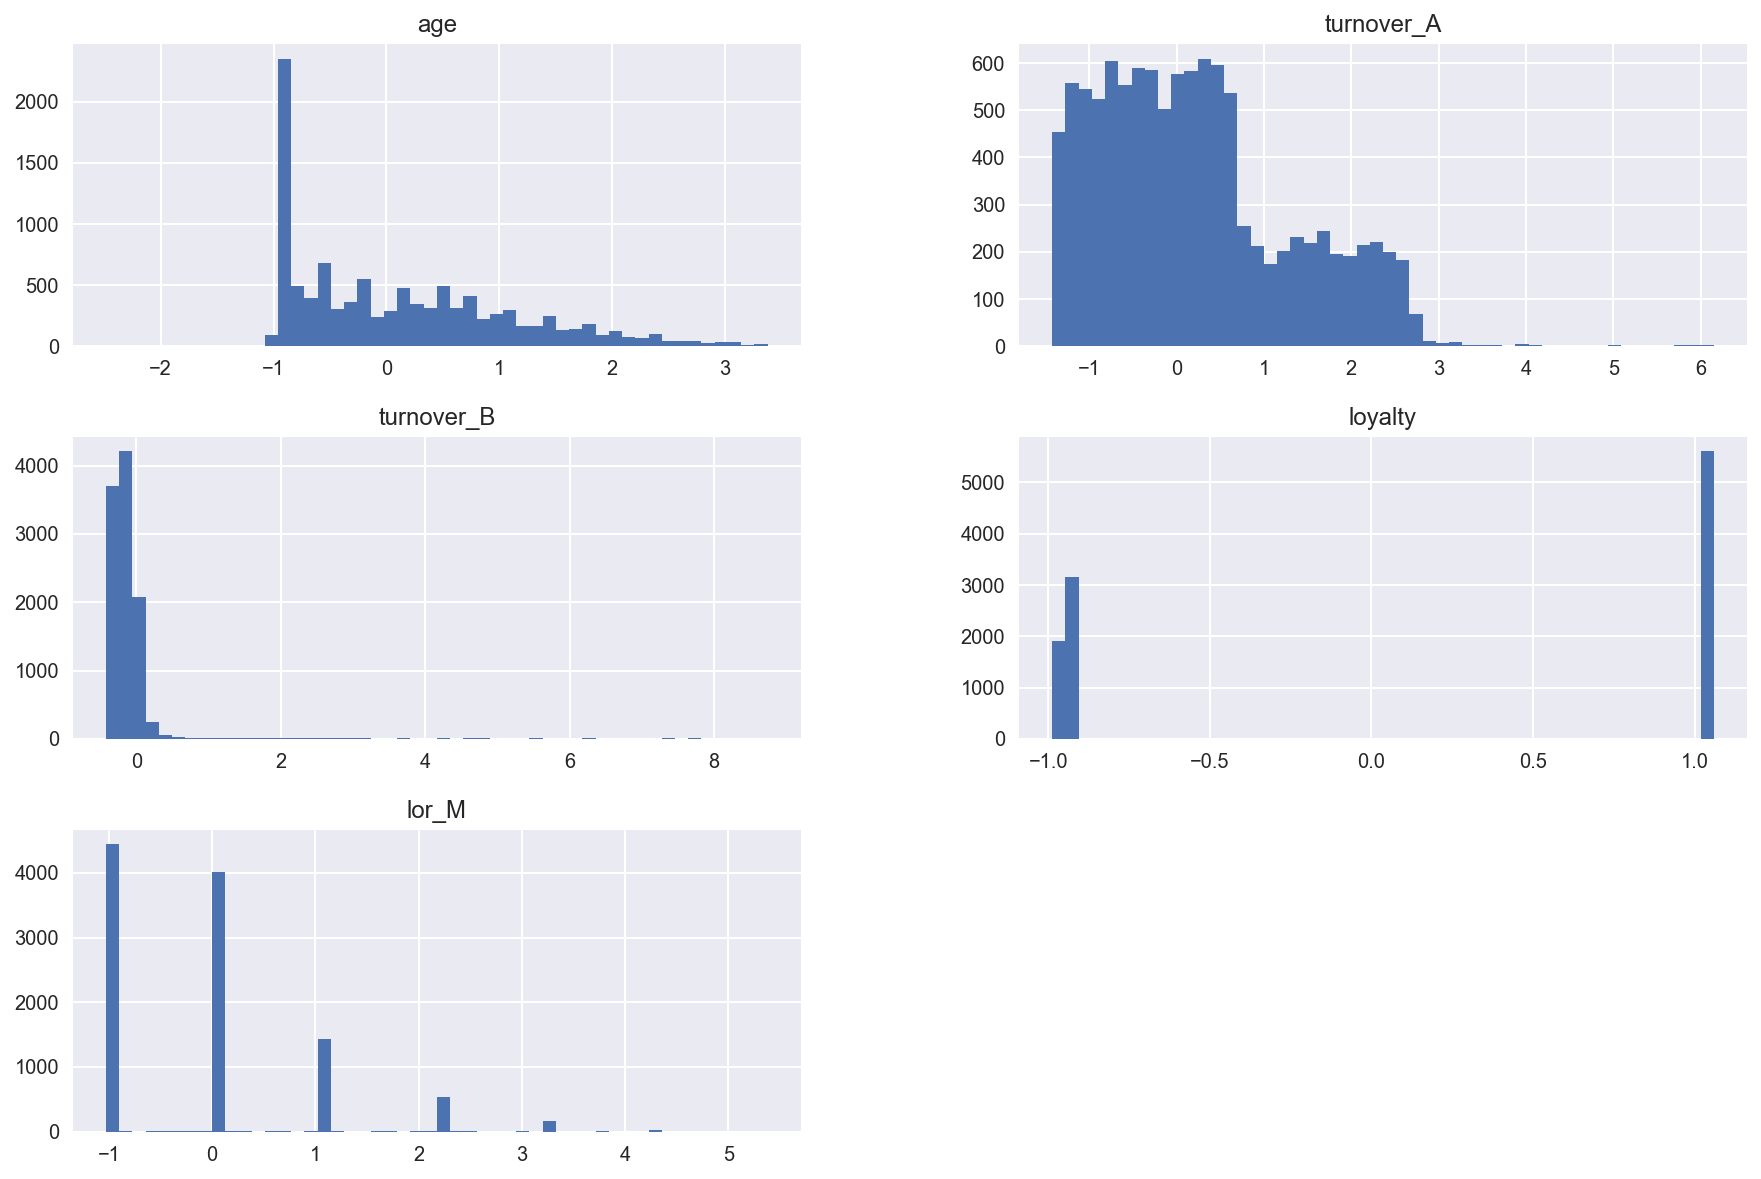

In [83]:
# draw the histogram for count variables
X_train_dummy[num_cols].hist(bins=50, figsize=(15,10))
plt.show()

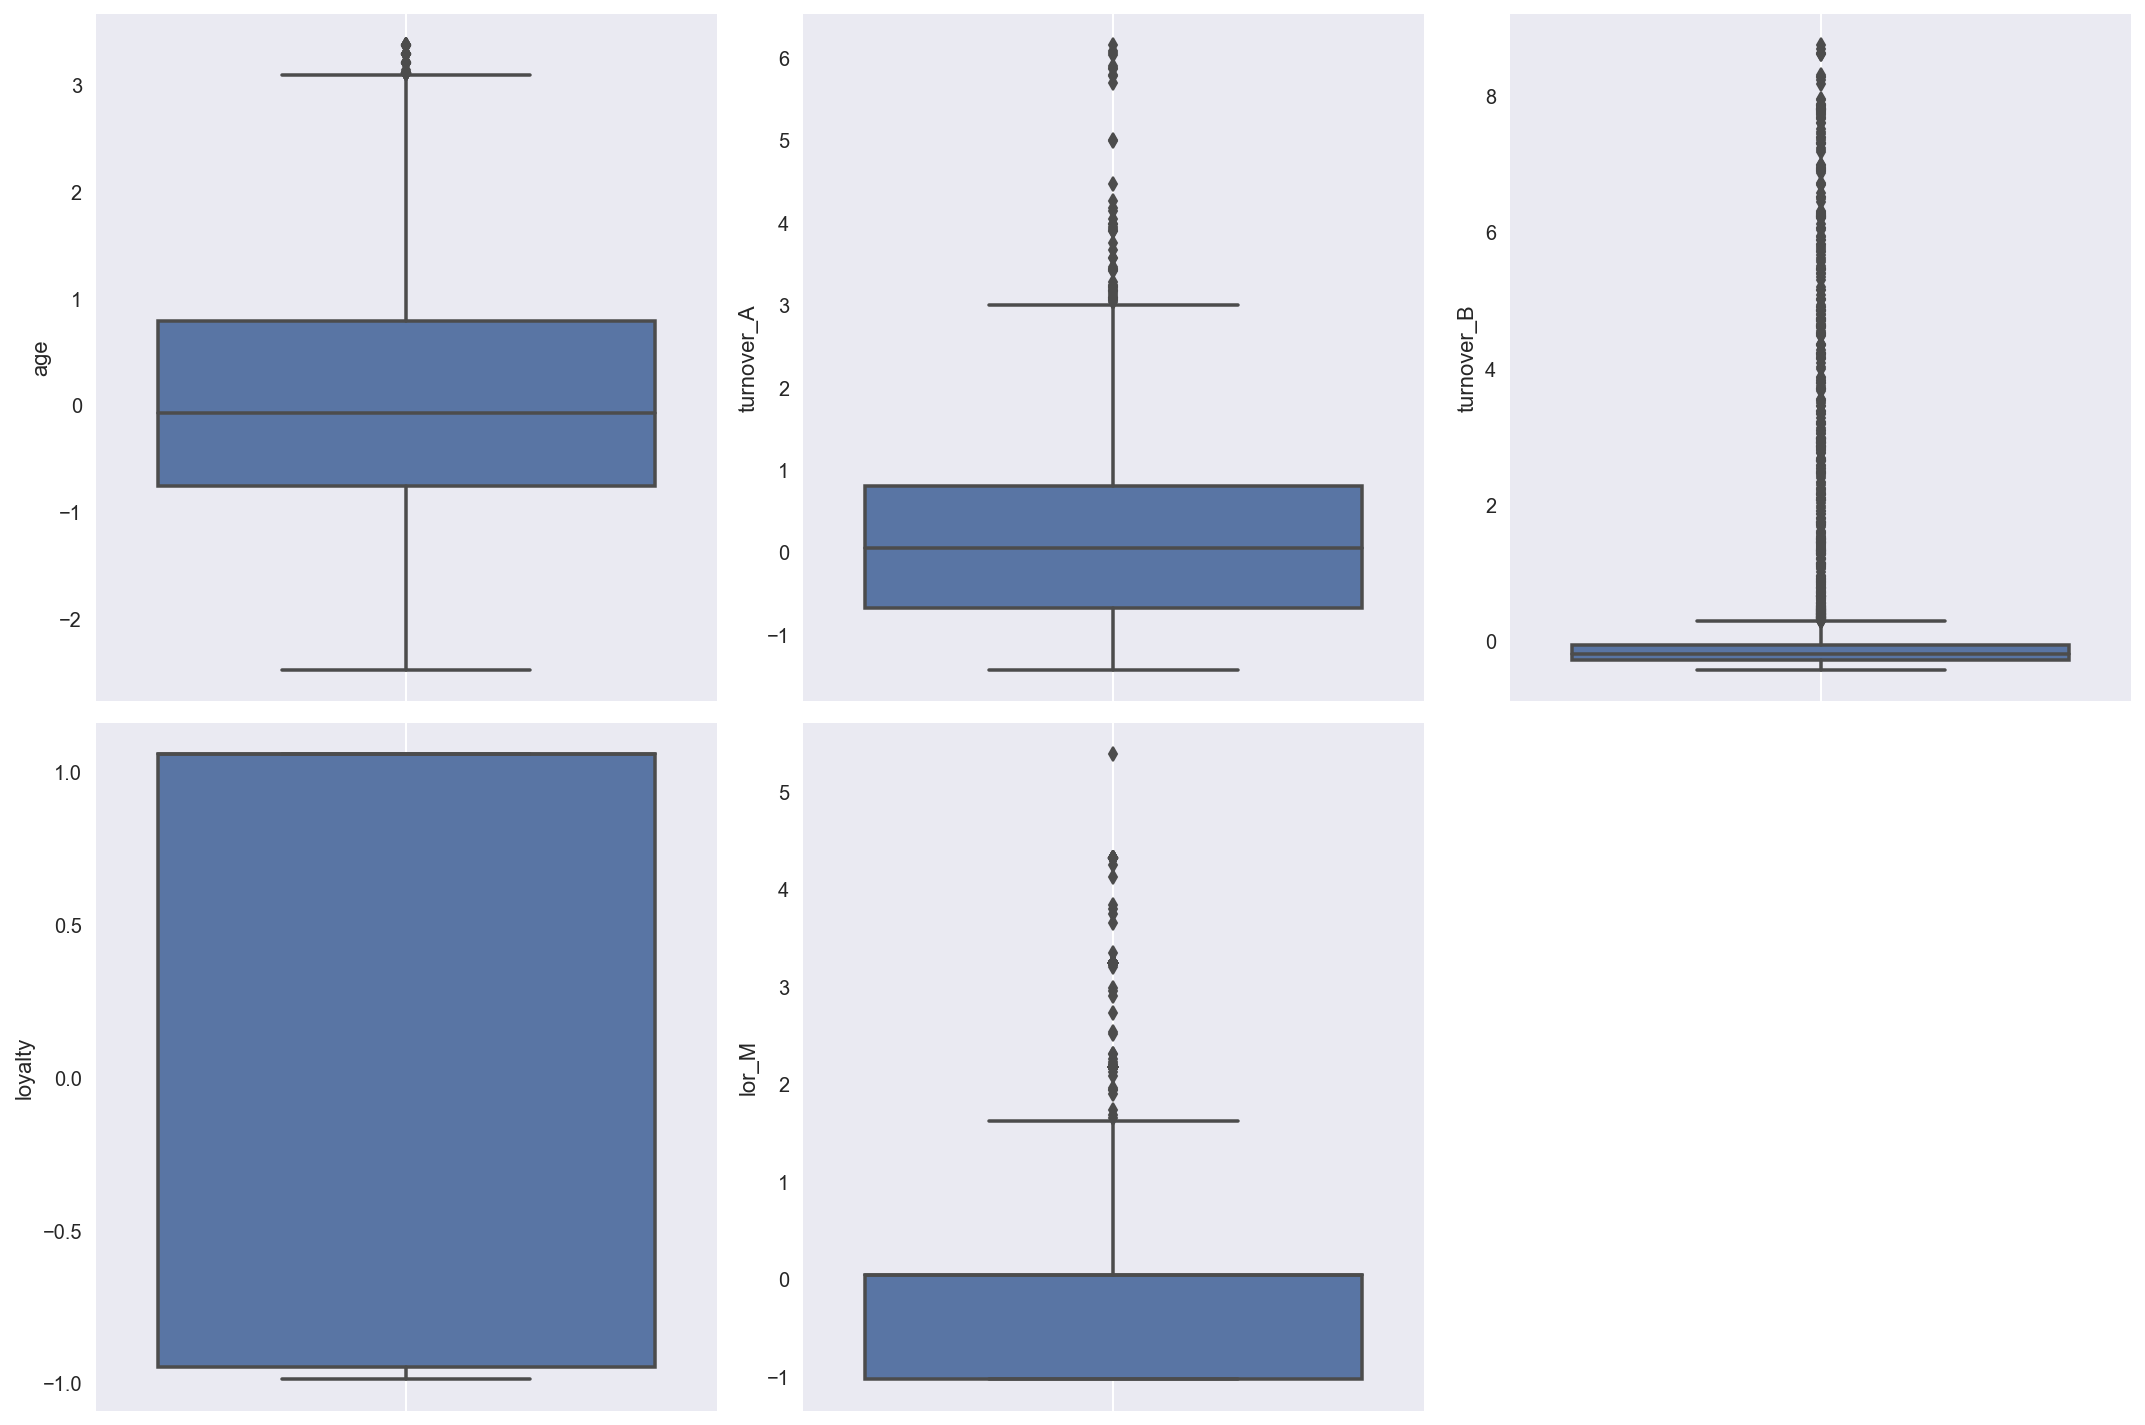

In [84]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=X_train_dummy, y=col, orient="v")
    plt.grid()
    plt.tight_layout()

In [85]:
tmp_df = pd.concat([y_train, X_train_dummy], axis=1)

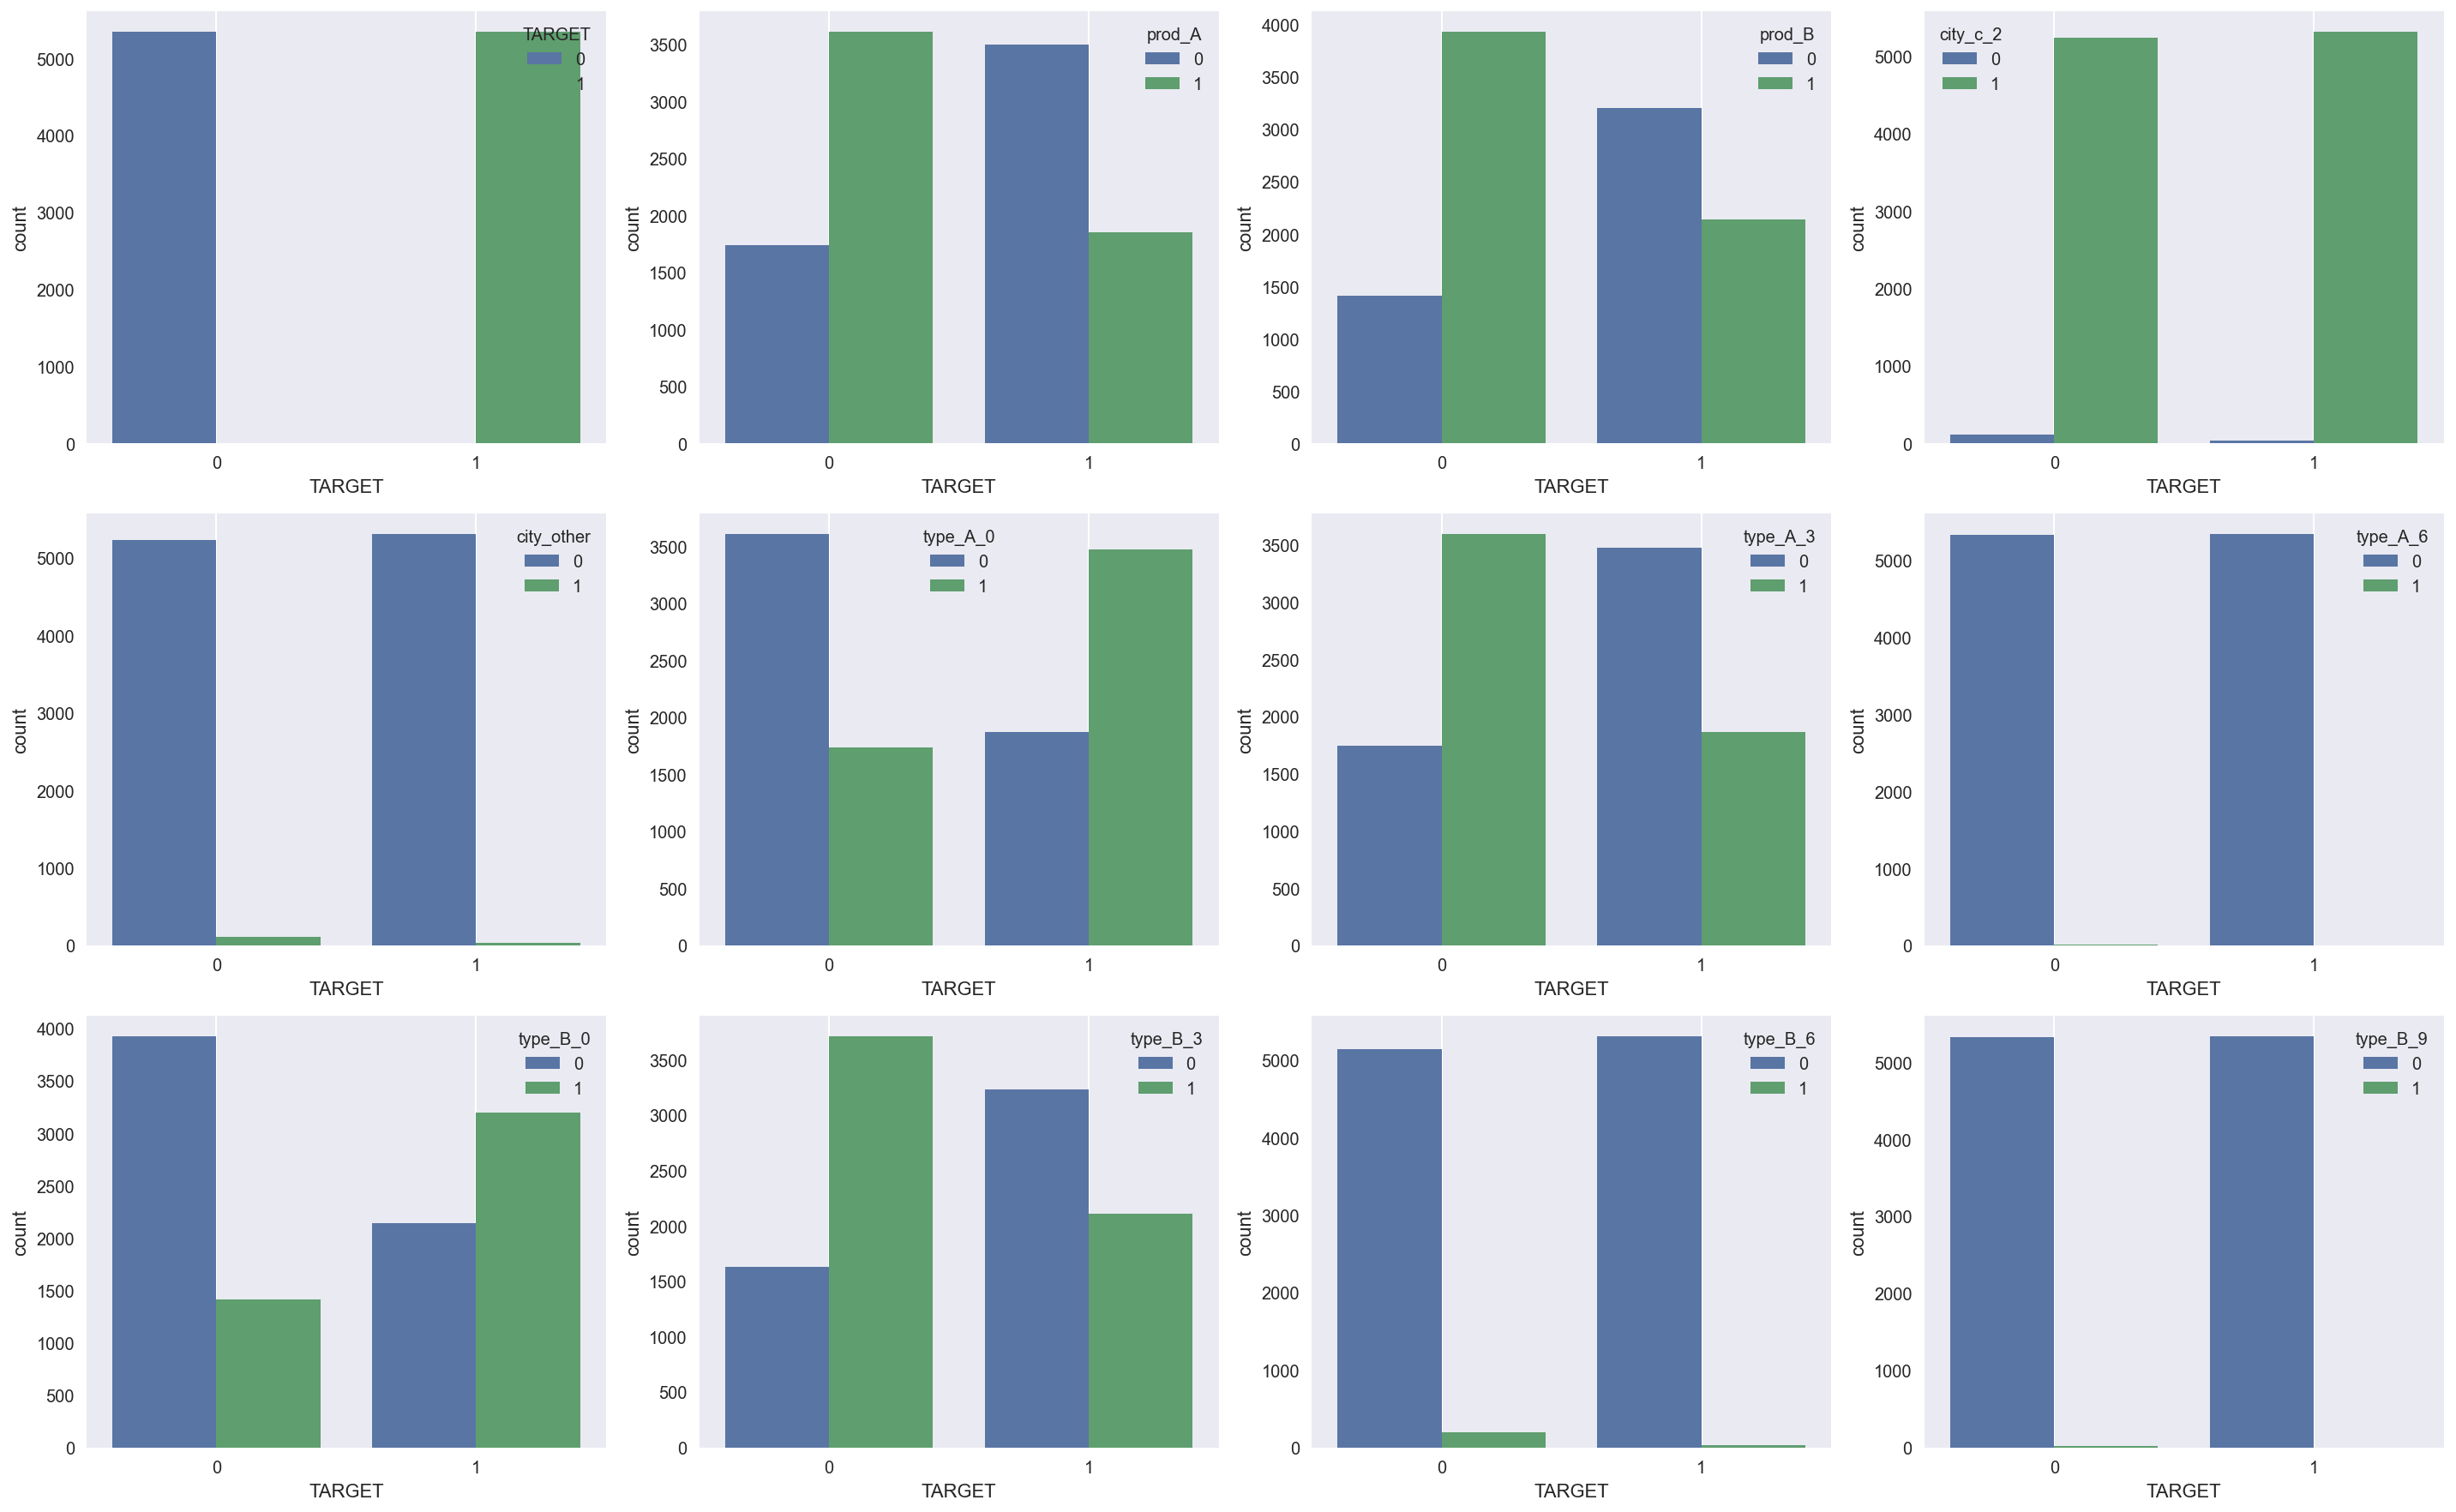

In [86]:
# To use bar charts to compare pairs of variables between Response and Explanatory
plt.figure(figsize = (20, 16))

for i, col in enumerate(list(['TARGET'] + cat_cols)):
    plt.subplot(4, 4, i + 1)
    # sns.countplot(x=col, data=re_eda_df, color='blue')
    sns.countplot(x='TARGET', hue=col, data=tmp_df)
    plt.grid()
    plt.tight_layout()

In [87]:
tmp_df[['TARGET'] + num_cols].corr()

,TARGET,age,turnover_A,turnover_B,loyalty,lor_M
TARGET,1.000000,0.306456,0.433608,-0.069356,0.242976,-0.189063
age,0.306456,1.000000,0.191934,0.199776,0.010617,0.070748
turnover_A,0.433608,0.191934,1.000000,0.001644,0.053336,-0.005537
turnover_B,-0.069356,0.199776,0.001644,1.000000,-0.170273,0.165991
loyalty,0.242976,0.010617,0.053336,-0.170273,1.000000,-0.675715
lor_M,-0.189063,0.070748,-0.005537,0.165991,-0.675715,1.000000


### Summary of Re-EDA

Response: TARGET

Numerical Variables: 'age', 'turnover_A', 'turnover_B', 'loyalty', 'lor_M'.

Categorical Varables: 'prod_A', 'prod_B', 'city_c_2', 'city_other', 'type_A_0', 'type_A_3', 'type_A_6',
       'type_B_0', 'type_B_3', 'type_B_6', 'type_B_9'

The correlation values between response (TARGET) and other variables have decreased. Numerical variables become more concentrate and have less outliers.

# 6. Feature selecting
- Select features based on EDA
- AdaBoostClassifier
- SVC
- DecisionTree

In [88]:
# how many people bought products in the training set?
y_train.values.sum()

5342

In [89]:
# what percentage of the training set survived?
y_train.values.sum() / X_train_dummy.shape[0] * 100

50.0

In [90]:
# show the dummied X_train
X_train_dummy.head(3)

,loyalty,age,prod_A,prod_B,turnover_A,turnover_B,lor_M,city_c_2,city_other,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1.059175,-0.933091,1,1,-0.130602,-0.282623,0.040241,1,0,0,1,0,0,1,0,0
1,1.059175,-0.071028,0,0,2.058967,-0.081331,-1.027960,1,0,1,0,0,1,0,0,0
2,1.059175,2.601369,0,0,0.132223,-0.184974,0.040241,0,1,1,0,0,1,0,0,0


__Based on Rerun EDA__ I can select features for Logistic Regression Model.

From the above EDA, I will select features for model 1

numerical features: age, turnover_A. They have positive correlations

categorical features: type_A_0, type_B_0. 

In [91]:
tmp_df[['TARGET'] + num_cols].corr()

,TARGET,age,turnover_A,turnover_B,loyalty,lor_M
TARGET,1.000000,0.306456,0.433608,-0.069356,0.242976,-0.189063
age,0.306456,1.000000,0.191934,0.199776,0.010617,0.070748
turnover_A,0.433608,0.191934,1.000000,0.001644,0.053336,-0.005537
turnover_B,-0.069356,0.199776,0.001644,1.000000,-0.170273,0.165991
loyalty,0.242976,0.010617,0.053336,-0.170273,1.000000,-0.675715
lor_M,-0.189063,0.070748,-0.005537,0.165991,-0.675715,1.000000


In [92]:
tmp_df['type_A_0'].value_counts()

0    5478
1    5206
Name: type_A_0, dtype: int64

In [93]:
tmp_df['type_B_0'].value_counts()

0    6071
1    4613
Name: type_B_0, dtype: int64

In [94]:
features_model_1 = ['age', 'turnover_A', 'loyalty', 'type_A_0', 'type_B_0']
X_train_dummy[features_model_1].head(3)

,age,turnover_A,loyalty,type_A_0,type_B_0
0,-0.933091,-0.130602,1.059175,0,0
1,-0.071028,2.058967,1.059175,1,1
2,2.601369,0.132223,1.059175,1,1


__AdaBoostClassifier__ can select features.

In [95]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train_dummy, y_train)

model_ada = SelectFromModel(ada, prefit=True)

mask = model_ada.get_support()
features_model_2 = X_train_dummy.columns[mask]

print(features_model_2)

Index(['loyalty', 'age', 'turnover_A', 'turnover_B'], dtype='object')


__SVC__ can select features.

In [96]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.01, penalty = "l1", dual=False).fit(X_train_dummy, y_train)
model_lsvc = SelectFromModel(lsvc, prefit=True)

mask = model_lsvc.get_support()
features_model_3 = X_train_dummy.columns[mask]

print(features_model_3)

Index(['loyalty', 'age', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'city_c_2', 'city_other', 'type_B_0', 'type_B_6'],
      dtype='object')


__DecisionTree__ can select features.

In [97]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(splitter="random").fit(X_train_dummy, y_train)

model_gnb = SelectFromModel(clf, prefit=True)

mask = model_gnb.get_support()
features_model_4 = X_train_dummy.columns[mask]

print(features_model_4)

Index(['age', 'prod_B', 'turnover_A', 'turnover_B'], dtype='object')


# 7. Classfication Modeling

2 KNN models

2 SVM models

### Base line

In [98]:
#prepared_is_df['TARGET'].values.sum()
y_test.values.sum()

885

In [99]:
y_test.values.sum() / X_test.shape[0] * 100

27.874015748031493

Since we know that 27.87% of the people in the training set bought products, we could achieve a training model accuracy of (100 - 27.87) = 72.13% by simply predicting "Did not but product" for each customer. This metric is referred to as the __null error rate__.  When evaluating the performance of a binary logistic regression model, always check to see whether the accuracy models are attaining exceeds the __null error rate__. If not, model is unlikely to be of any value.

#### Check the response

<AxesSubplot:>

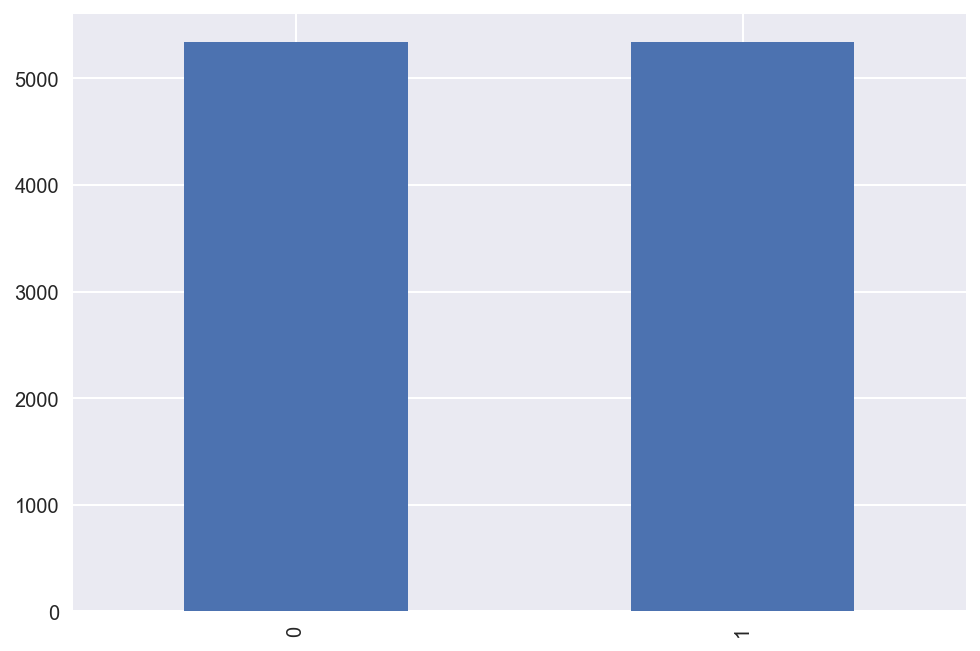

In [100]:
y_train.value_counts().plot.bar()

It is an balance response.

In [101]:
def print_coef_feature(model_, features_):
    
    # Print the names of the columns.
    print ("{:<20} {:<10} ".format('feature', 'coef'))
    
    for coef, feat in zip(model_.coef_[0,:], features_):
        
        print("{:<10} {:<10}".format(feat, coef))

In [102]:
from sklearn import metrics

In [103]:
# use cross validation to fit train set
def my_cls_cv(model_name, model_, X_df, y_df, cv = 5):
    
    auc_arr = []
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    i = 1
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test_, model_.predict(X_test_))
        auc_ = metrics.auc(fpr, tpr)
        auc_arr.append(auc_)
        
        accuracy = accuracy_score(y_test_, model_.predict(X_test_))
        accuracy_arr.append(accuracy)
        
        precision = precision_score(y_test_, model_.predict(X_test_))
        precision_arr.append(precision)
        
        recall = metrics.recall_score(y_test_, model_.predict(X_test_))
        recall_arr.append(recall)
        
        #print(f"fold no. %d on the KFold test set: accuracy = %.4f, precision = %.4f, auc = %.4f" %(i, accuracy, precision, roc))

        i += 1
        
    #print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. auc = %.4f" %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    return np.mean(accuracy_arr), np.mean(precision_arr), np.mean(auc_arr), np.mean(recall_arr)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

def knn_cv_k(features_name) :
    odd_ks = []
    for i in range(20):
        if i % 2 != 0:
            odd_ks.append(i)
    
    avg_accs = []
    avg_pres = []
    avg_aucs = []
    avg_recalls = []

    dic = {"k" : odd_ks, 
           # "Avg_accuracy" : avg_accs, 
           "Avg_precision" : avg_pres, 
           "Avg_auc" : avg_aucs, 
           "avg_recall" : avg_recalls}
    for k in odd_ks:
        knc = KNeighborsClassifier(n_neighbors=k)
        a,b,c,d = my_cls_cv("knn_model_1", knc, X_train_dummy[features_name], y_train)
        avg_accs.append(a)
        avg_pres.append(b)
        avg_aucs.append(c)
        avg_recalls.append(d)
        
    knn_1_res_df = pd.DataFrame(dic)
    
    return knn_1_res_df
    
    #plt.figure(figsize=(10, 4))
    #g = sns.lineplot(x='k', y='value', ci=None, hue='variable', data=pd.melt(knn_1_res_df, ['k']))
    


In [105]:
def draw_multi_lines(knn_1_res_df):
    f, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=knn_1_res_df.iloc[:,1:], ax = ax)

    ax.set_xticks(range(len(knn_1_res_df)))
    ax.set_xticklabels(knn_1_res_df["k"])
    plt.show()

In [106]:
def run_cv_4_models(model_name, model_, X_df, y_df, cv = 5):
    a,b,c,d = my_cls_cv(model_name, model_, X_df, y_df)
    
    print("Avg. precision = %.4f, Avg. auc = %.4f, Avg. recall = %.4f " %(b, c, d))
    return {"name": model_name, "Avg. precision" : b, "Avg. auc" : c, "Avg. recall" : d}

#### KNN Model 1 

In [107]:
# check features
features_model_1

['age', 'turnover_A', 'loyalty', 'type_A_0', 'type_B_0']

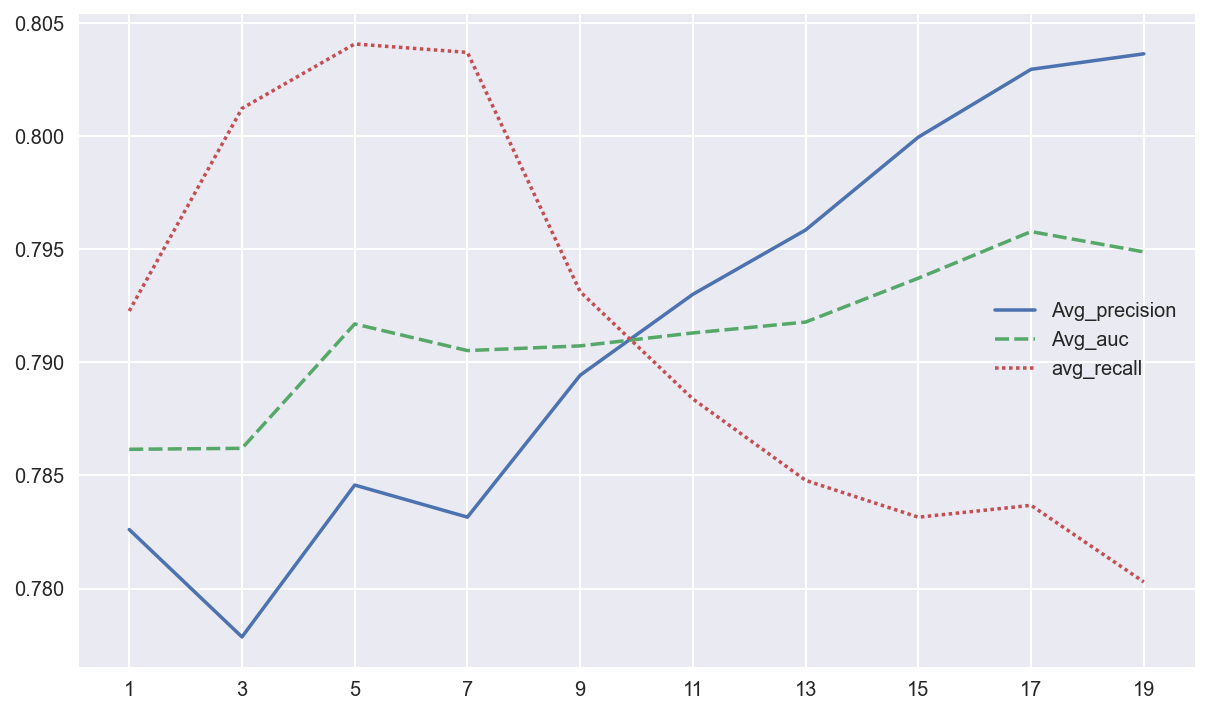

In [108]:
# using cross validation to find out the best K
knn_m1_result_df = knn_cv_k(features_model_1)
draw_multi_lines(knn_m1_result_df)

The above plot shows that the recall drop significantly when K is larger than 7. I will select K = 7 for thee KNN model 1.

In [109]:
knn_model_1 = KNeighborsClassifier(n_neighbors=5)
result_model_1 = run_cv_4_models("knn_model_1", knn_model_1, X_train_dummy[features_model_1], y_train)

Avg. precision = 0.7846, Avg. auc = 0.7917, Avg. recall = 0.8041 


knn_model_1 used 5 features ('age', 'turnover_A', 'loyalty', 'type_A_0', 'type_B_0'). Through cross validation we can see that the recall fell significantly when K is larger than 7. 

#### KNN Model 2

In [110]:
# check features
features_model_2

Index(['loyalty', 'age', 'turnover_A', 'turnover_B'], dtype='object')

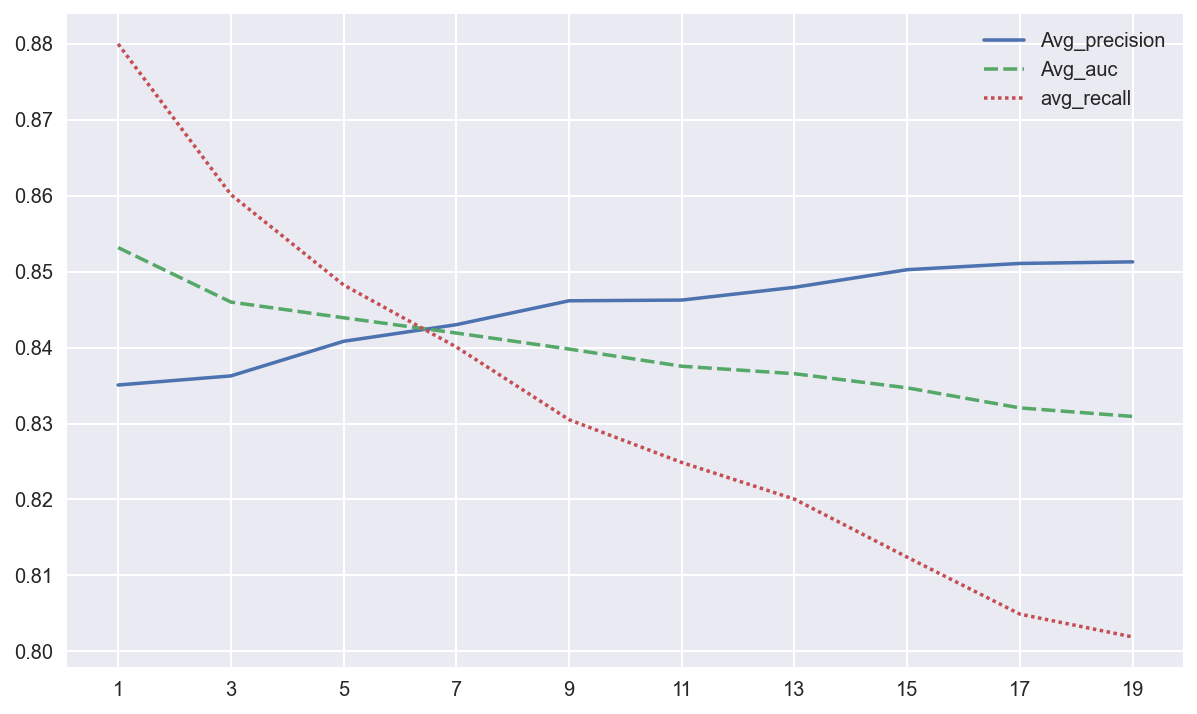

In [111]:
knn_m2_result_df = knn_cv_k(features_model_2)
draw_multi_lines(knn_m2_result_df)

The above plot shows that the recall drop significantly when K is larger than 5. I will select K = 5 for thee KNN model 2.

In [112]:
knn_model_2 = KNeighborsClassifier(n_neighbors=5)
result_model_2 = run_cv_4_models("knn_model_2", knn_model_2, X_train_dummy[features_model_2], y_train)

Avg. precision = 0.8408, Avg. auc = 0.8439, Avg. recall = 0.8482 


knn_model_2 used 4 features ('loyalty', 'age', 'turnover_A', 'turnover_B'). Through cross validation we can see that the recall fell significantly when K is larger than 5. 

### SVM

- svm model 1 with RBF kernel
  - Using grid search and cross validation to find the best C and gamma for RBF
  - C: The bigger, the less support vectors, overfitting.
  - gamma: The bigger, the less support vectors, overfitting.

- svm model 2 with linear kernel
  - Using cross validation to find the C for linearSVC

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svm_rbf_cv(x, y):
    model_ = SVC(kernel='rbf', probability=True)
    
    param_map = {'C':[1, 10], 'gamma' : [0.1, 0.01]}
    grid_search = GridSearchCV(model_, param_map, verbose=1)
    grid_search.fit(x, y)
    best_parameters = grid_search.best_estimator_.get_params()
    
    for para, val in list(best_parameters.items()):
        print(para, val)
    
    new_model_ = SVC(kernel='rbf', C = best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    new_model_.fit(x, y)
    
    return new_model_

In [114]:
from sklearn.svm import LinearSVC
def svm_linear_cv(features_name) :
    c_arr = [0.1, 1, 10]

    
    avg_accs = []
    avg_pres = []
    avg_aucs = []
    avg_recalls = []

    dic = {"c" : c_arr, 
           # "Avg_accuracy" : avg_accs, 
           "Avg_precision" : avg_pres, 
           "Avg_auc" : avg_aucs, 
           "avg_recall" : avg_recalls}
    for c in c_arr:
        knc = LinearSVC(C=c, max_iter=10000)
        a,b,c,d = my_cls_cv("svm_linearSVC_model_2", knc, X_train_dummy[features_name], y_train)
        avg_accs.append(a)
        avg_pres.append(b)
        avg_aucs.append(c)
        avg_recalls.append(d)
        
    knn_1_res_df = pd.DataFrame(dic)
    
    return knn_1_res_df

def draw_svm_multi_lines(knn_1_res_df):
    f, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=knn_1_res_df.iloc[:,1:], ax = ax)

    ax.set_xticks(range(len(knn_1_res_df)))
    ax.set_xticklabels(knn_1_res_df["c"])
    plt.show()

#### SVM model 1 with rbf kernel

In [115]:
# check the features
features_model_3

Index(['loyalty', 'age', 'prod_A', 'prod_B', 'turnover_A', 'turnover_B',
       'city_c_2', 'city_other', 'type_B_0', 'type_B_6'],
      dtype='object')

In [116]:
# using grid search and cross validation to find out the best C and gamma
svm_rbf_model_1 = svm_rbf_cv(X_train_dummy[features_model_3], y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
C 10
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.1
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False


The above result of GridSearch shows the best C and gamma. I use the best C and gamma to create the SVC model named svm_rbf_model_1

In [117]:
result_model_3 = run_cv_4_models("svm_rbf_model_1", svm_rbf_model_1, X_train_dummy[features_model_3], y_train)

Avg. precision = 0.8734, Avg. auc = 0.8441, Avg. recall = 0.8046 


#### SVM model 2 - LinearSVC

In [150]:
# check the features
features_model_4

Index(['age', 'prod_B', 'turnover_A', 'turnover_B'], dtype='object')

In [118]:
# Using cross validation to find out the best C for LinearSVC
svm_linear_rs_df = svm_linear_cv(features_model_4)

D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to c

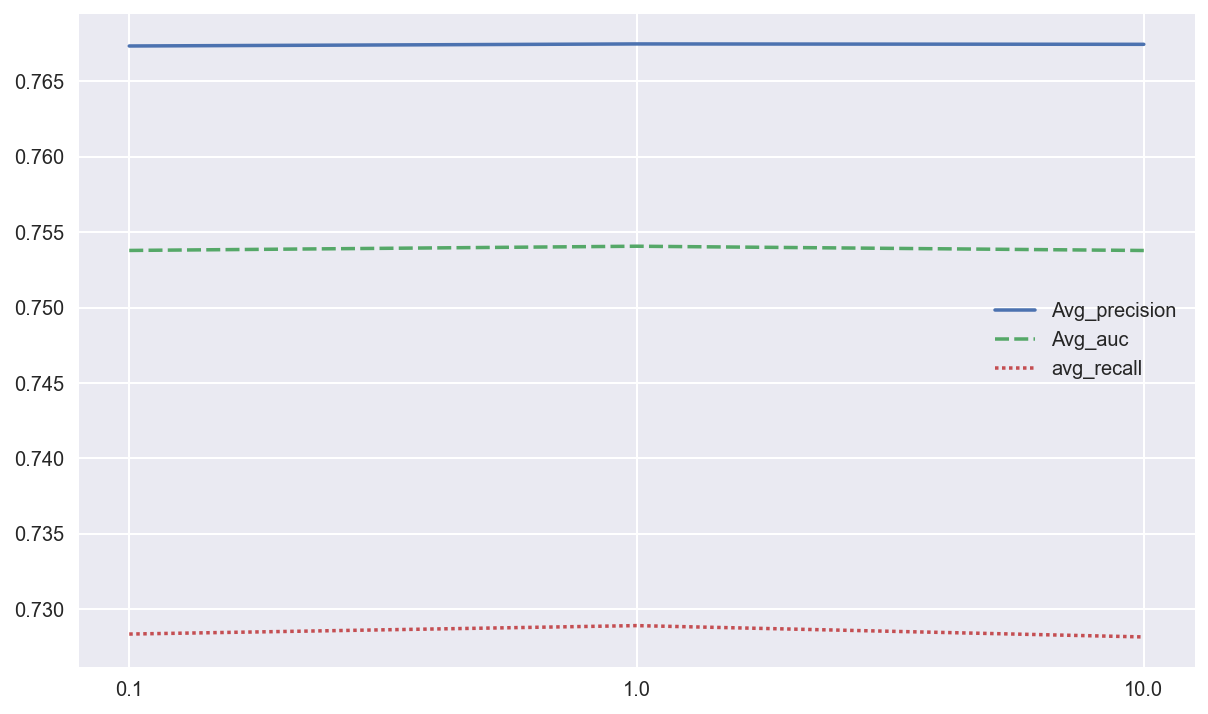

In [119]:
# draw line plot to see recall by different C
draw_svm_multi_lines(svm_linear_rs_df)

From the above plot, we can see that the LinearSVC has been affected slightly with different C. I will select C = 1 for LinearSCV

In [120]:
svm_linearSVC_model_2 = LinearSVC(C=1, max_iter=10000)

result_model_4 = run_cv_4_models("svm_linearSVC_model_2", svm_linearSVC_model_2, X_train_dummy[features_model_3], y_train)

# show the coef
print_coef_feature(svm_linearSVC_model_2, features_model_4)

Avg. precision = 0.7707, Avg. auc = 0.7575, Avg. recall = 0.7329 
feature              coef       
age        0.0007506109889392082
prod_B     0.2531165299693246
turnover_A -0.1749681921402174
turnover_B -0.2634283451789443


From result of svm_linearSVC_model_2 we see that:

age: An increase in the value of 'age' is associated with a increased likelihood of TARGET (yes, this customer will buy new insurance.)

type_B: If customers bought the type_B, it will increase likelihood of TARGET.

turnover_A: An increase in the value of 'turnover_A' is associated with a decreased likelihood of TARGET.

turnover_B: An increase in the value of 'turnover_B' is associated with a decreased likelihood of TARGET.

### compare 4 models

In [121]:
arr = [result_model_1, result_model_2, result_model_3, result_model_4]

# {"model_name":"model_1", "roc_arr":roc_arr, "accuracy_arr":accuracy_arr, "precision_arr":precision_arr,}
for m in arr:
    print(f"%s : Avg. precision = %.4f, Avg. auc = %.4f, Avg. recall = %.4f" 
          %(m['name'], m['Avg. precision'], m['Avg. auc'], m['Avg. recall']))

knn_model_1 : Avg. precision = 0.7846, Avg. auc = 0.7917, Avg. recall = 0.8041
knn_model_2 : Avg. precision = 0.8408, Avg. auc = 0.8439, Avg. recall = 0.8482
svm_rbf_model_1 : Avg. precision = 0.8734, Avg. auc = 0.8441, Avg. recall = 0.8046
svm_linearSVC_model_2 : Avg. precision = 0.7707, Avg. auc = 0.7575, Avg. recall = 0.7329


In [122]:
features_model_2

Index(['loyalty', 'age', 'turnover_A', 'turnover_B'], dtype='object')

### Summary

I prefer the knn_model_2 because it has only 4 features ('loyalty', 'age', 'turnover_A', 'turnover_B'), which is easy to interpretate with the highest recall score and acceptable precision. Next, I will go to dig into interpretating the knn_model_2. I did not select the svm_rbf_model_1 (SVM with RBF kernel) because svm_rbf_model_1 spend the most time in 4 models and the recall of it is not the highest in 4 models. If I want to select a model with the highest precision, I will select the svm_rbf_model_1

# 8. Select Models

use knn_model_2 to get the predictions from balanced train set

In [123]:
y_train_predict = knn_model_2.predict(X_train_dummy[features_model_2])

In [124]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5342
           1       0.88      0.89      0.89      5342

    accuracy                           0.89     10684
   macro avg       0.89      0.89      0.89     10684
weighted avg       0.89      0.89      0.89     10684



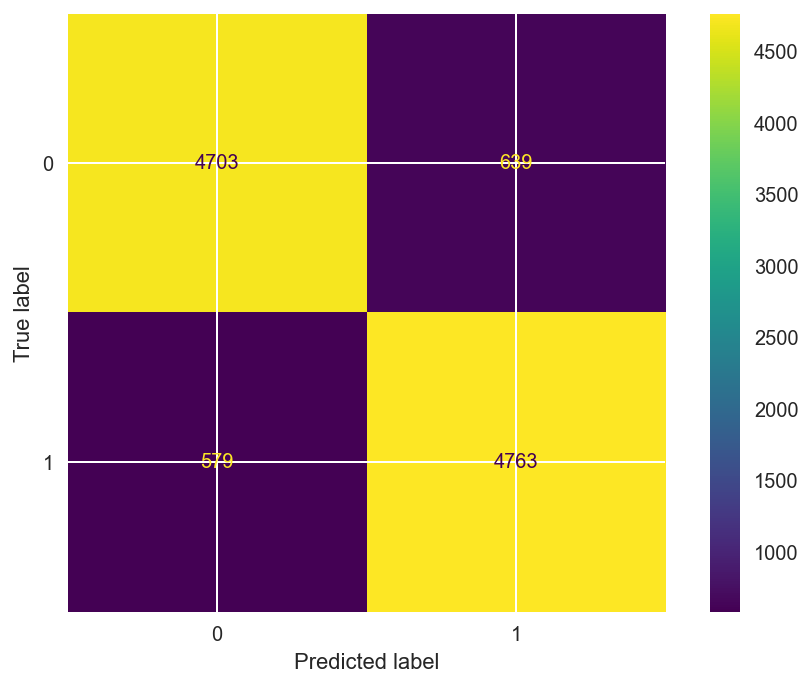

In [125]:
plot_confusion_matrix(knn_model_2, X_train_dummy[features_model_2], y_train)

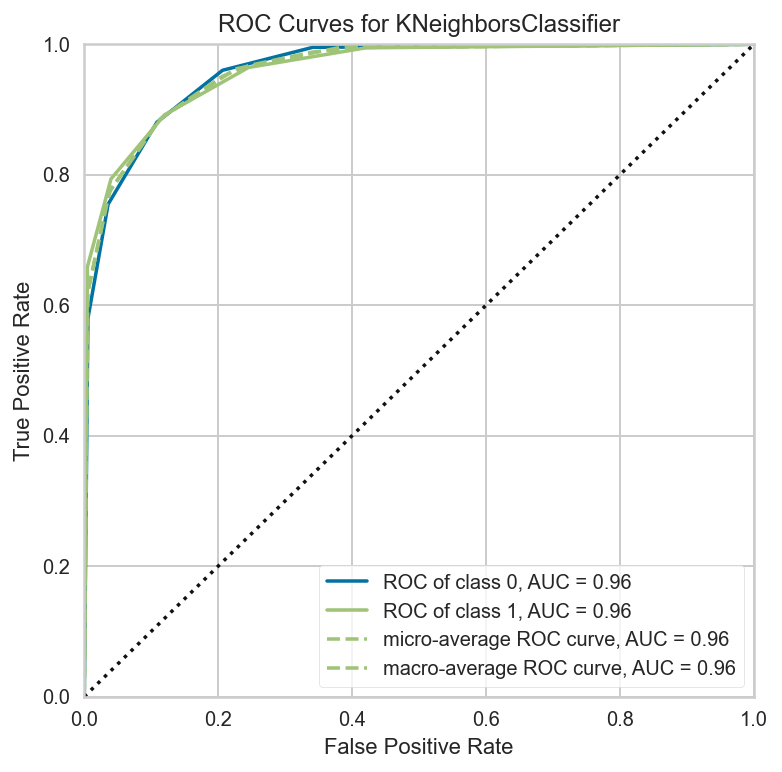

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [126]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(knn_model_2)
roc_viz.fit(X_train_dummy[features_model_2], y_train)
roc_viz.score(X_train_dummy[features_model_2], y_train)
roc_viz.poof()

The model on the train set has:

recall = 0.89

precision = 0.88

AUC = 0.96

#### predict the imblanced test set

Generate predictions for the test data using our new model

In [127]:
# predict the test set
y_predict = knn_model_2.predict(X_test_dummy[features_model_2])

### Evaluate the model with imbalanced test set

In [128]:
test_predictions = knn_model_2.predict(X_test_dummy[features_model_2])

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2290
           1       0.65      0.74      0.69       885

    accuracy                           0.82      3175
   macro avg       0.77      0.79      0.78      3175
weighted avg       0.83      0.82      0.82      3175



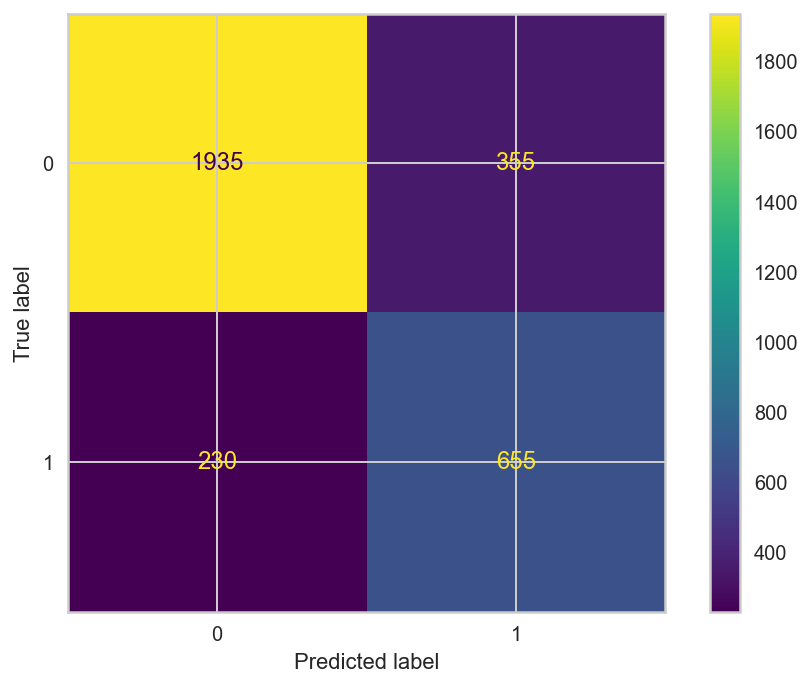

In [129]:
plot_confusion_matrix(knn_model_2, X_test_dummy[features_model_2], y_test)

# print(confusion_matrix(y_test, test_predictions))

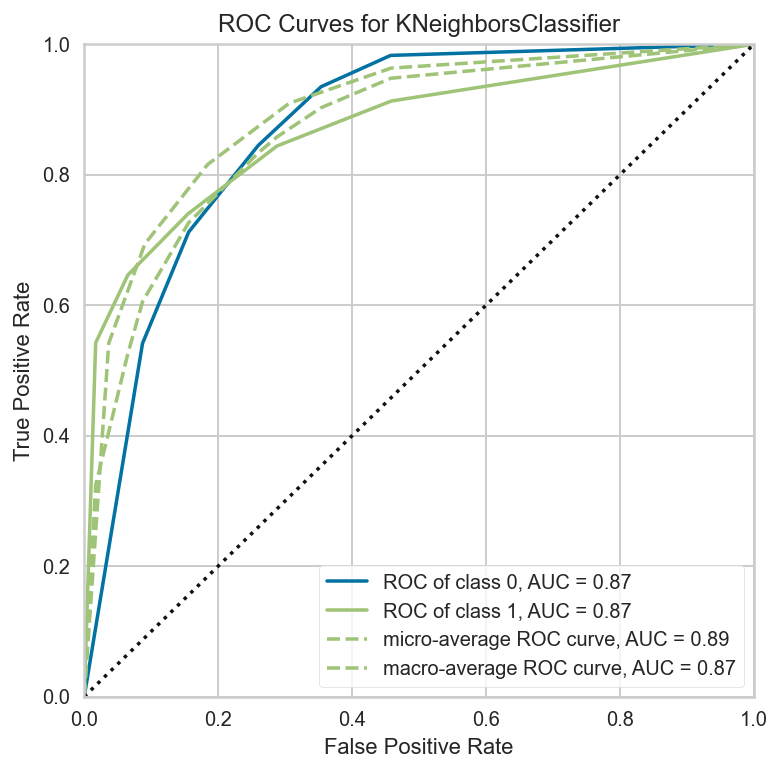

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [130]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(knn_model_2)
roc_viz.fit(X_test_dummy[features_model_2], y_test)
roc_viz.score(X_test_dummy[features_model_2], y_test)
roc_viz.poof()

The model on the test set has:

recall = 0.74

precision = 0.65

AUC = 0.87

### Summary

I use over sampling to solve the imbalanced TARGET.

- The evaluations of model on __train set (over sampling balanced set)__ are followed:

recall = 0.89; precision = 0.88; Accuracy = 0.89; AUC = 0.96

- The evaluations of model on __test set (imbalanced set)__ are followed:

recall = 0.74; precision = 0.65; Accuracy = 0.82; AUC = 0.87

- The __baseline(the null error rate)__ of the data set is Accuracy of (100 - 27.87) = 72.13%.

I got a model that the Accuracy of test set is higher than baseline with around 10%.

# 9. Conclusion

Exploration Data Analysis

- In the EDA, I found that some variables are multicollinearity with others. Also, I found that ID is the unique identification of an observation. Thrid, there are outliers in the numerical variables.

Data Preparation

- I dropped duplicated rows. I dropped one variable that is multicollinearity with other. Also, I dropped the ID and Outliers. Using over sampling to solve the imbalanced train set.

Feature selection

- I used the finding of EDA, AdaBoostClassifier, LinearSVC, and DecisionTree to select features.
- The features selected by AdaBoostClassifier have the best performance on the KNN.

Model

- KNN: I used cross validation to find out the best K for model. I select the K when the recall drop significantly.

  - RBF kernel
    - C: The bigger, the less support vectors, overfitting.
    - gamma: The bigger, the less support vectors, overfitting.

- SVM: I used GridSearch to find out the best parameters, like C and gamma, for KNN with RBF kernel and Linear kernel. I found that the LinearSVC has been affected slightly with different C.

- GridSearch and Corss validation: They can help us find out the best parameters for models, like KNN and SVM

I chose KNN to predict the TARGET(1=Yes, 0=No). From 4 models with different features, I selected a model that used 4 features that are easy to interpretate, and the recall is the highest in them.

# 10. Reference

https://www.kaggle.com/rluyck/insurance-company

https://scikit-learn.org/

https://imbalanced-learn.org/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989